Ahmet Emre Belge - 3149309

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 8.7 MB/s eta 0:00:00


In [ ]:
pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.1/203.1 kB 21.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8807 sha256=b505015b35034e001b5488beff3ea04320a0c2115d014d4cdc4a20e554c4a8b1
  Stored in directory: /root/.cache/pip/wheels/e7/f3/22/152153d6eb222ee7a56ff8617d80ee5207207a8c00a7aab794
Successfully built pathtools


In [ ]:
import shap

In [ ]:
import wandb

In [ ]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from xgboost import plot_importance
from xgboost.sklearn import XGBModel
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.model_selection import cross_val_score

In [ ]:
df_train = pd.read_csv("/content/train.csv")
df_test = pd.read_csv("/content/test_updated.csv")

#Have a look at the dataset and handle nans


In [ ]:
df_train

id   price balcony               conditions  construction_year  \
0      10461   60000    True  Buono stato / Abitabile             1980.0   
1      51304  900000     NaN  Buono stato / Abitabile                NaN   
2      33032   33000     NaN  Buono stato / Abitabile             1960.0   
3      62281  166000     NaN   Ottimo / Ristrutturato                NaN   
4      45681  410000    True  Buono stato / Abitabile                NaN   
...      ...     ...     ...                      ...                ...   
46307  33085  329999    True  Buono stato / Abitabile             1929.0   
46308  17403  599000    True         Da ristrutturare             1920.0   
46309  33332  549000    True  Buono stato / Abitabile                NaN   
46310  63367  189000    True  Buono stato / Abitabile             1965.0   
46311  27322  355000    True   Ottimo / Ristrutturato             1970.0   

        latitude  longitude  energy_efficiency  expenses  floor garden  \
0      41.901300  12.700000             175.00      30.0    2.0    NaN   
1      41.907017  12.481311                NaN       NaN    3.0    NaN   
2      41.976500  12.440500             204.20      30.0    4.0    NaN   
3      45.484800  12.198200             175.00       NaN    1.0   True   
4      45.424480  12.328622              65.91       NaN    3.0    NaN   
...          ...        ...                ...       ...    ...    ...   
46307  41.923500  12.446100             175.00      35.0    3.0    NaN   
46308  41.916743  12.454925                NaN     170.0    6.0    NaN   
46309  45.454701   9.242711                NaN       NaN    NaN    NaN   
46310  45.445605   9.245942                NaN     150.0   -1.0   True   
46311  41.877000  12.431400             175.00     100.0    1.0    NaN   

       n_bathrooms  elevator  total_floors  n_rooms  proximity_to_center  \
0              1.0       NaN           3.0      1.0              1.00000   
1              1.0       1.0           NaN      3.0              1.00000   
2              1.0       NaN           4.0      1.0              1.00000   
3              1.0       NaN           1.0      2.0              0.99205   
4              2.0       1.0           NaN      3.0              1.00000   
...            ...       ...           ...      ...                  ...   
46307          1.0       NaN           4.0      3.0              1.00000   
46308          2.0       1.0           NaN      5.0              1.00000   
46309          2.0       1.0           NaN      3.0              1.00000   
46310          1.0       1.0           NaN      3.0              1.00000   
46311          1.0       1.0           5.0      4.0              1.00000   

       surface  
0         35.0  
1        131.0  
2         16.0  
3        100.0  
4         90.0  
...        ...  
46307     88.0  
46308    189.0  
46309    140.0  
46310     70.0  
46311    101.0  

[46312 rows x 17 columns]

In [ ]:
df_train = df_train.drop(df_train[df_train["price"]>13000000].index)

(array([2.4116e+04, 1.4390e+04, 3.8140e+03, 1.6630e+03, 7.3200e+02,
        4.6700e+02, 2.6500e+02, 1.9900e+02, 8.9000e+01, 1.0500e+02,
        7.2000e+01, 6.1000e+01, 4.6000e+01, 2.7000e+01, 1.5000e+01,
        4.5000e+01, 2.0000e+01, 7.0000e+00, 1.1000e+01, 2.5000e+01,
        9.0000e+00, 1.7000e+01, 1.0000e+00, 8.0000e+00, 1.1000e+01,
        6.0000e+00, 6.0000e+00, 6.0000e+00, 1.0000e+00, 2.0000e+00,
        9.0000e+00, 1.0000e+00, 1.0000e+00, 4.0000e+00, 0.0000e+00,
        1.0000e+00, 9.0000e+00, 1.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([1.54000000e+02, 3.25150150e+05, 6.50146300e+05, 9.75142450e+05,
        1.30013860e+06, 1.62513475e+06, 1.95013090e+06, 2.27512705e+06,
        2.60012320e+06, 2.92511935e+06, 3.25011550e+06, 3.57511165e+06,
        3.90010780e+06, 4.22510395e+06, 4.55010010e+06, 4.87509625e+06,
        5.20009240e+06, 5.52508855e+06, 5.85008470e+06, 6.17508085e+06,
        6.50007700e+06, 6.82507315e+06, 7.15006930e+06, 7.47506545e+06,
        7.80006160e+06

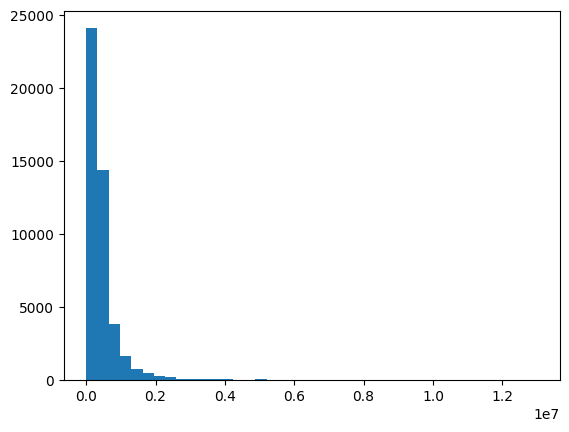

In [ ]:
plt.hist(df_train["price"], bins=40)

In [ ]:
df_train["price"].describe()

count    4.626400e+04
mean     4.773936e+05
std      6.490425e+05
min      1.540000e+02
25%      1.990000e+05
50%      3.150000e+05
75%      5.100000e+05
max      1.300000e+07
Name: price, dtype: float64

In [ ]:
pip install powerlaw

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import powerlaw

Text(0.5, 1.0, 'Power law fit to Prices')

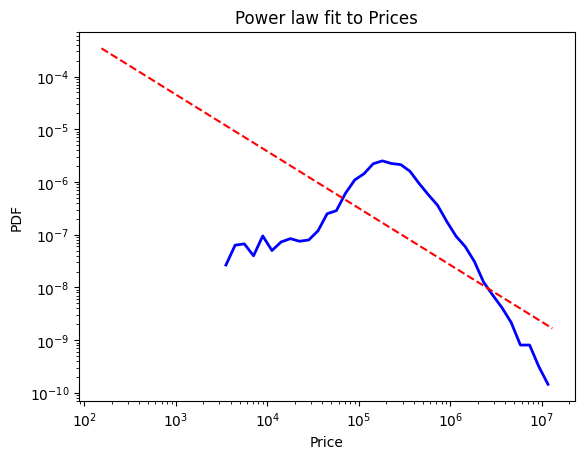

In [ ]:
fit = powerlaw.Fit(df_train["price"], xmin=1)
fig = fit.plot_pdf(color='b', linewidth=2)
fit.power_law.plot_pdf(color='r', linestyle='--', ax=fig)

In [ ]:
df_train.isna().sum()

id                         0
price                      0
balcony                15443
conditions              1229
construction_year      13946
latitude                  13
longitude                 13
energy_efficiency      19903
expenses               16154
floor                   2031
garden                 31529
n_bathrooms             2416
elevator               17443
total_floors           18349
n_rooms                  353
proximity_to_center       13
surface                  443
dtype: int64

In [ ]:
df_train["garden"] = df_train["garden"].fillna(False)
df_train["elevator"] = df_train["elevator"].fillna(False)
df_train["balcony"] = df_train["balcony"].fillna(False)

In [ ]:
df_test["garden"] = df_test["garden"].fillna(False)
df_test["elevator"] = df_test["elevator"].fillna(False)
df_test["balcony"] = df_test["balcony"].fillna(False)

Now I am going to see the baseline model before cleaning the data and inputation to see if i can drop the columns with lots of nans. For this I will train the data with rows with any nan dropped.

In [ ]:
def encoder(value):
    encoding = {'Buono stato / Abitabile': 1, 'Ottimo / Ristrutturato': 2, 'Da ristrutturare': 0, 'Nuovo / Nuova costruzione': 3}
    if pd.isna(value):
        return np.nan
    else:
        return encoding[value]

df_train = df_train.drop("id", axis=1)
df_train["conditions"] = df_train["conditions"].apply(encoder)
df_train["balcony"] = df_train["balcony"].apply(lambda x: 1 if x else 0)
df_train["garden"] = df_train["garden"].apply(lambda x: 1 if x else 0)
df_train["elevator"] = df_train["elevator"].apply(lambda x: 1 if x else 0)




In [ ]:

df_test["conditions"] = df_test["conditions"].apply(encoder)
df_test["balcony"] = df_test["balcony"].apply(lambda x: 1 if x else 0)
df_test["garden"] = df_test["garden"].apply(lambda x: 1 if x else 0)
df_test["elevator"] = df_test["elevator"].apply(lambda x: 1 if x else 0)


In [ ]:
df_train.isna().sum()

price                      0
balcony                    0
conditions              1229
construction_year      13946
latitude                  13
longitude                 13
energy_efficiency      19903
expenses               16154
floor                   2031
garden                     0
n_bathrooms             2416
elevator                   0
total_floors           18349
n_rooms                  353
proximity_to_center       13
surface                  443
dtype: int64

In [ ]:
df_test.isna().sum()

id                        0
balcony                   0
conditions              511
construction_year      5964
latitude                 10
longitude                10
energy_efficiency      8570
expenses               6971
floor                   876
garden                    0
n_bathrooms             951
elevator                  0
total_floors           7938
n_rooms                 141
proximity_to_center      10
surface                 163
dtype: int64

In [ ]:
df_dropped = df_train.dropna()

In [ ]:
X = df_dropped.drop('price', axis=1)
y = df_dropped['price']

# create an XGBoost model
model = xgb.XGBRegressor()

# perform 5-fold cross-validation and compute the mean R^2 score
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_score = scores.mean()
mean_score

-20295676638.466

In [ ]:
train_idx = []  # the index values to be used for training
previous = 0
np.random.seed(40)
for i, quantile in enumerate(np.arange(0.001, 1.001, .001)):
    if i == 0:
        temp = df_dropped[df_dropped['price'] <= df_dropped['price'].quantile(quantile)].copy()
        train_idx.extend(list(temp.sample(frac=0.8).index))
    else:
        temp = df_dropped[(df_dropped['price'] > df_dropped['price'].quantile(previous)) \
                          & (df_dropped['price'] <= df_dropped['price'].quantile(quantile))].copy()
        train_idx.extend(list(temp.sample(frac=0.8).index))
    previous = quantile

X_train = df_dropped.loc[train_idx].drop('price', axis=1)
y_train = df_dropped.loc[train_idx]['price']
X_val = df_dropped.loc[set(df_dropped.index) - set(train_idx)].drop('price', axis=1)
y_val = df_dropped.loc[set(df_dropped.index) - set(train_idx)]['price']


Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


In [ ]:
from xgboost import XGBRegressor

Mean Squared Error: 19088313336.01503


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


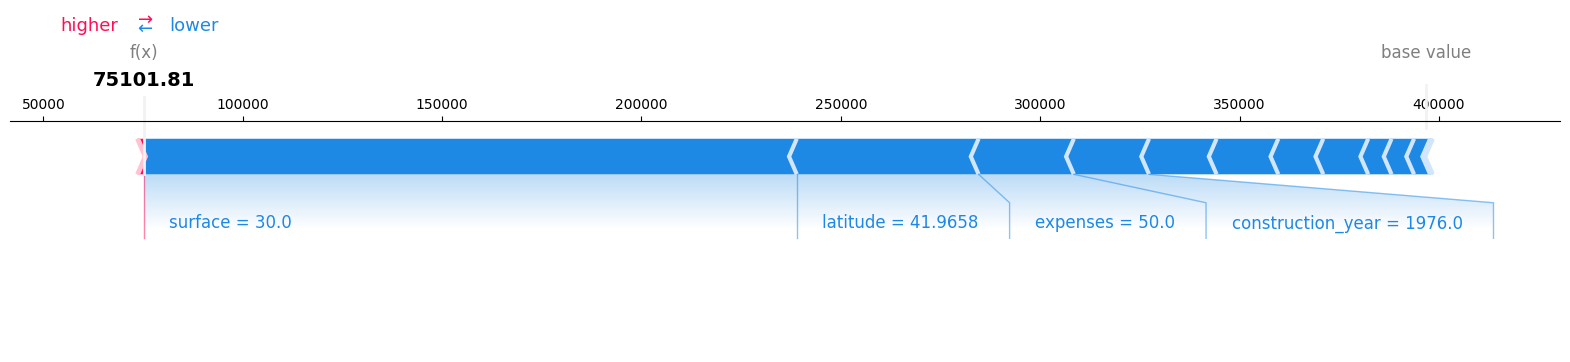

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


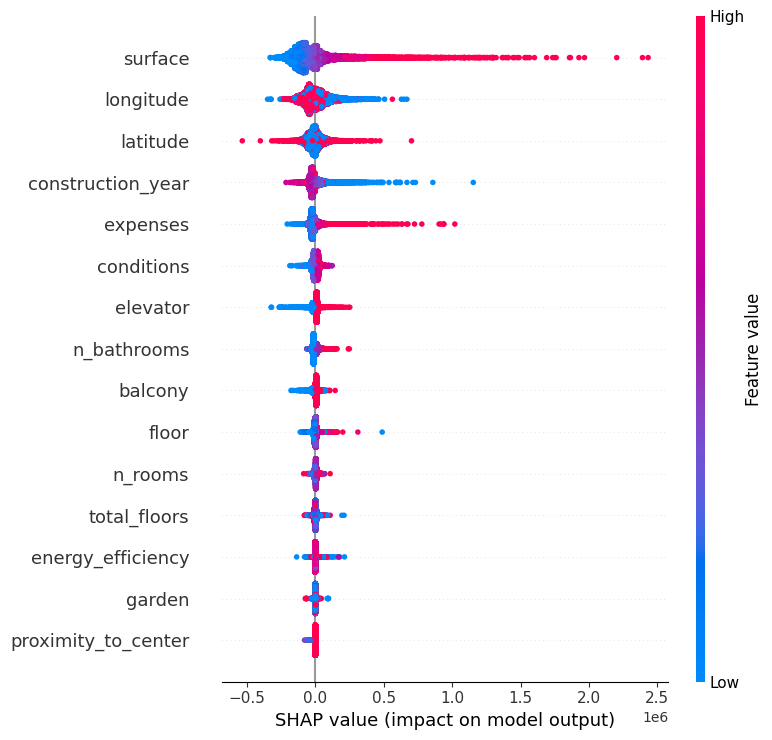

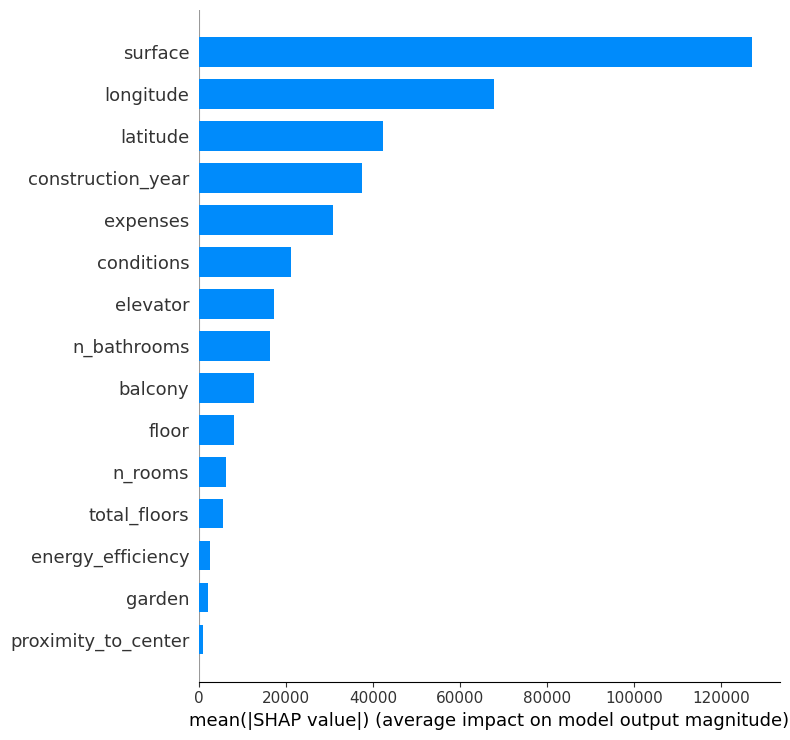

In [ ]:
# XGBOst
xgb = XGBRegressor(objective="reg:squarederror")
# Train the model
xgb.fit(X_train, y_train)
# Make predictions on the validation set
y_pred = xgb.predict(X_val)
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)
shap.initjs()


# tree = DecisionTreeRegressor()

# # Train the model
# tree.fit(X_train, y_train)

# # Make predictions on the validation set
# y_pred = tree.predict(X_val)

# # Calculate mean squared error (MSE)
# mse = mean_squared_error(y_val, y_pred)

# print("Mean Squared Error:", mse)

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)
#Force plot shows how independent variables affect the output values and the magnitude
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:], matplotlib=True)
#Summary plots give an overview of feature importance
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar')


In [ ]:
df_train.isna().sum()

price                      0
balcony                    0
conditions              1229
construction_year      13946
latitude                  13
longitude                 13
energy_efficiency      19903
expenses               16154
floor                   2031
garden                     0
n_bathrooms             2416
elevator                   0
total_floors           18349
n_rooms                  353
proximity_to_center       13
surface                  443
dtype: int64

We can drop the high na low value columns, siuch as total_floors, energy_efficiency, and garden and proximity

In [ ]:
df_t = df_train.copy()

In [ ]:
df_te = df_test.copy()

In [ ]:
df_train = df_train.drop(["total_floors", "energy_efficiency", "garden","proximity_to_center"], axis = 1)

In [ ]:
df_test = df_test.drop(["total_floors", "energy_efficiency", "garden","proximity_to_center"], axis = 1)

In [ ]:
df_train.isna().sum()/df_train.shape[0]

price                0.000000
balcony              0.000000
conditions           0.026537
construction_year    0.301131
latitude             0.000281
longitude            0.000281
expenses             0.348808
floor                0.043855
n_bathrooms          0.052168
elevator             0.000000
n_rooms              0.007622
surface              0.009566
dtype: float64

In [ ]:
df_test.isna().sum()/df_test.shape[0]

id                   0.000000
balcony              0.000000
conditions           0.025824
construction_year    0.301395
latitude             0.000505
longitude            0.000505
expenses             0.352284
floor                0.044269
n_bathrooms          0.048059
elevator             0.000000
n_rooms              0.007126
surface              0.008237
dtype: float64

similar missing distribution


I will drop all rows where any column, apart from construction_year and expenses are null.

In [ ]:
df_base = df_train.dropna(subset=[col for col in df_train.columns if col not in ['construction_year', 'expenses']])

In [ ]:
train_df = df_base.copy()

In [ ]:
from scipy.stats.mstats import winsorize

In [ ]:
za.isna().sum()

price                    0
balcony                  0
conditions               0
construction_year    11201
latitude                 0
longitude                0
expenses             13008
floor                    0
n_bathrooms              0
elevator                 0
n_rooms                  0
surface                  0
dtype: int64

# Exploratory Data Analysis

The correlation heatmap is a must

<Axes: >

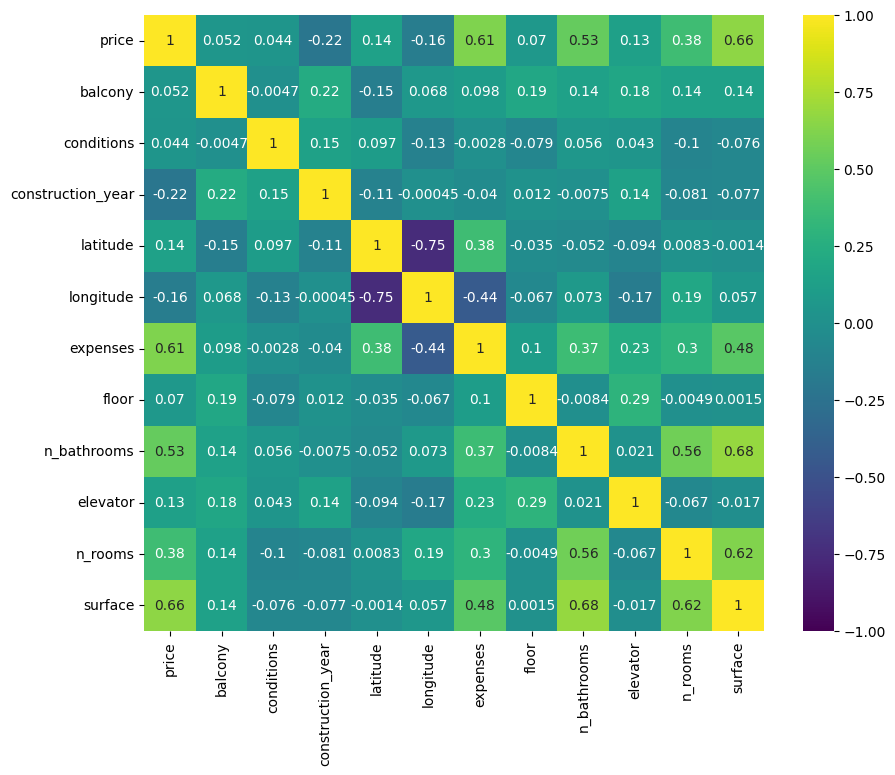

In [198]:
plt.figure(figsize=(10, 8), dpi = 100)
sns.heatmap(train_df.corr(), cmap='viridis', annot=True, vmin=-1, vmax=1, center=0)

## Univariate Data Exploration

First I want to take a look at each variable on its own to understand its distribution and features through tables and plots

In [ ]:
train_df.describe()

price       balcony    conditions  construction_year  \
count  4.089300e+04  40893.000000  40893.000000       29686.000000   
mean   4.227507e+05      0.681315      1.432054        1958.402243   
std    4.559648e+05      0.465972      0.904985          70.059249   
min    6.500000e+02      0.000000      0.000000        1000.000000   
25%    1.990000e+05      0.000000      1.000000        1950.000000   
50%    3.000000e+05      1.000000      1.000000        1965.000000   
75%    4.890000e+05      1.000000      2.000000        1985.000000   
max    2.900000e+07      1.000000      3.000000        2500.000000   

           latitude     longitude       expenses         floor   n_bathrooms  \
count  40893.000000  40893.000000   27882.000000  40893.000000  40893.000000   
mean      43.560488     11.414182     193.376946      2.041890      1.532732   
std        1.791351      1.518696    4084.975713      2.165515      0.721002   
min       41.690300      9.060775       0.000000     -4.000000      1.000000   
25%       41.882800      9.217846      40.000000      1.000000      1.000000   
50%       41.965500     12.358988      80.000000      2.000000      1.000000   
75%       45.466300     12.487900     150.000000      3.000000      2.000000   
max       45.561298     12.738422  346000.000000     26.000000      9.000000   

           elevator       n_rooms       surface  
count  40893.000000  40893.000000  40893.000000  
mean       0.633311      3.201037    103.737217  
std        0.481906      1.269168     61.467305  
min        0.000000      1.000000      0.000000  
25%        0.000000      2.000000     66.000000  
50%        1.000000      3.000000     90.000000  
75%        1.000000      4.000000    122.000000  
max        1.000000      9.000000    990.000000

In [ ]:
train_df['floor'] = train_df['floor'].astype(int)


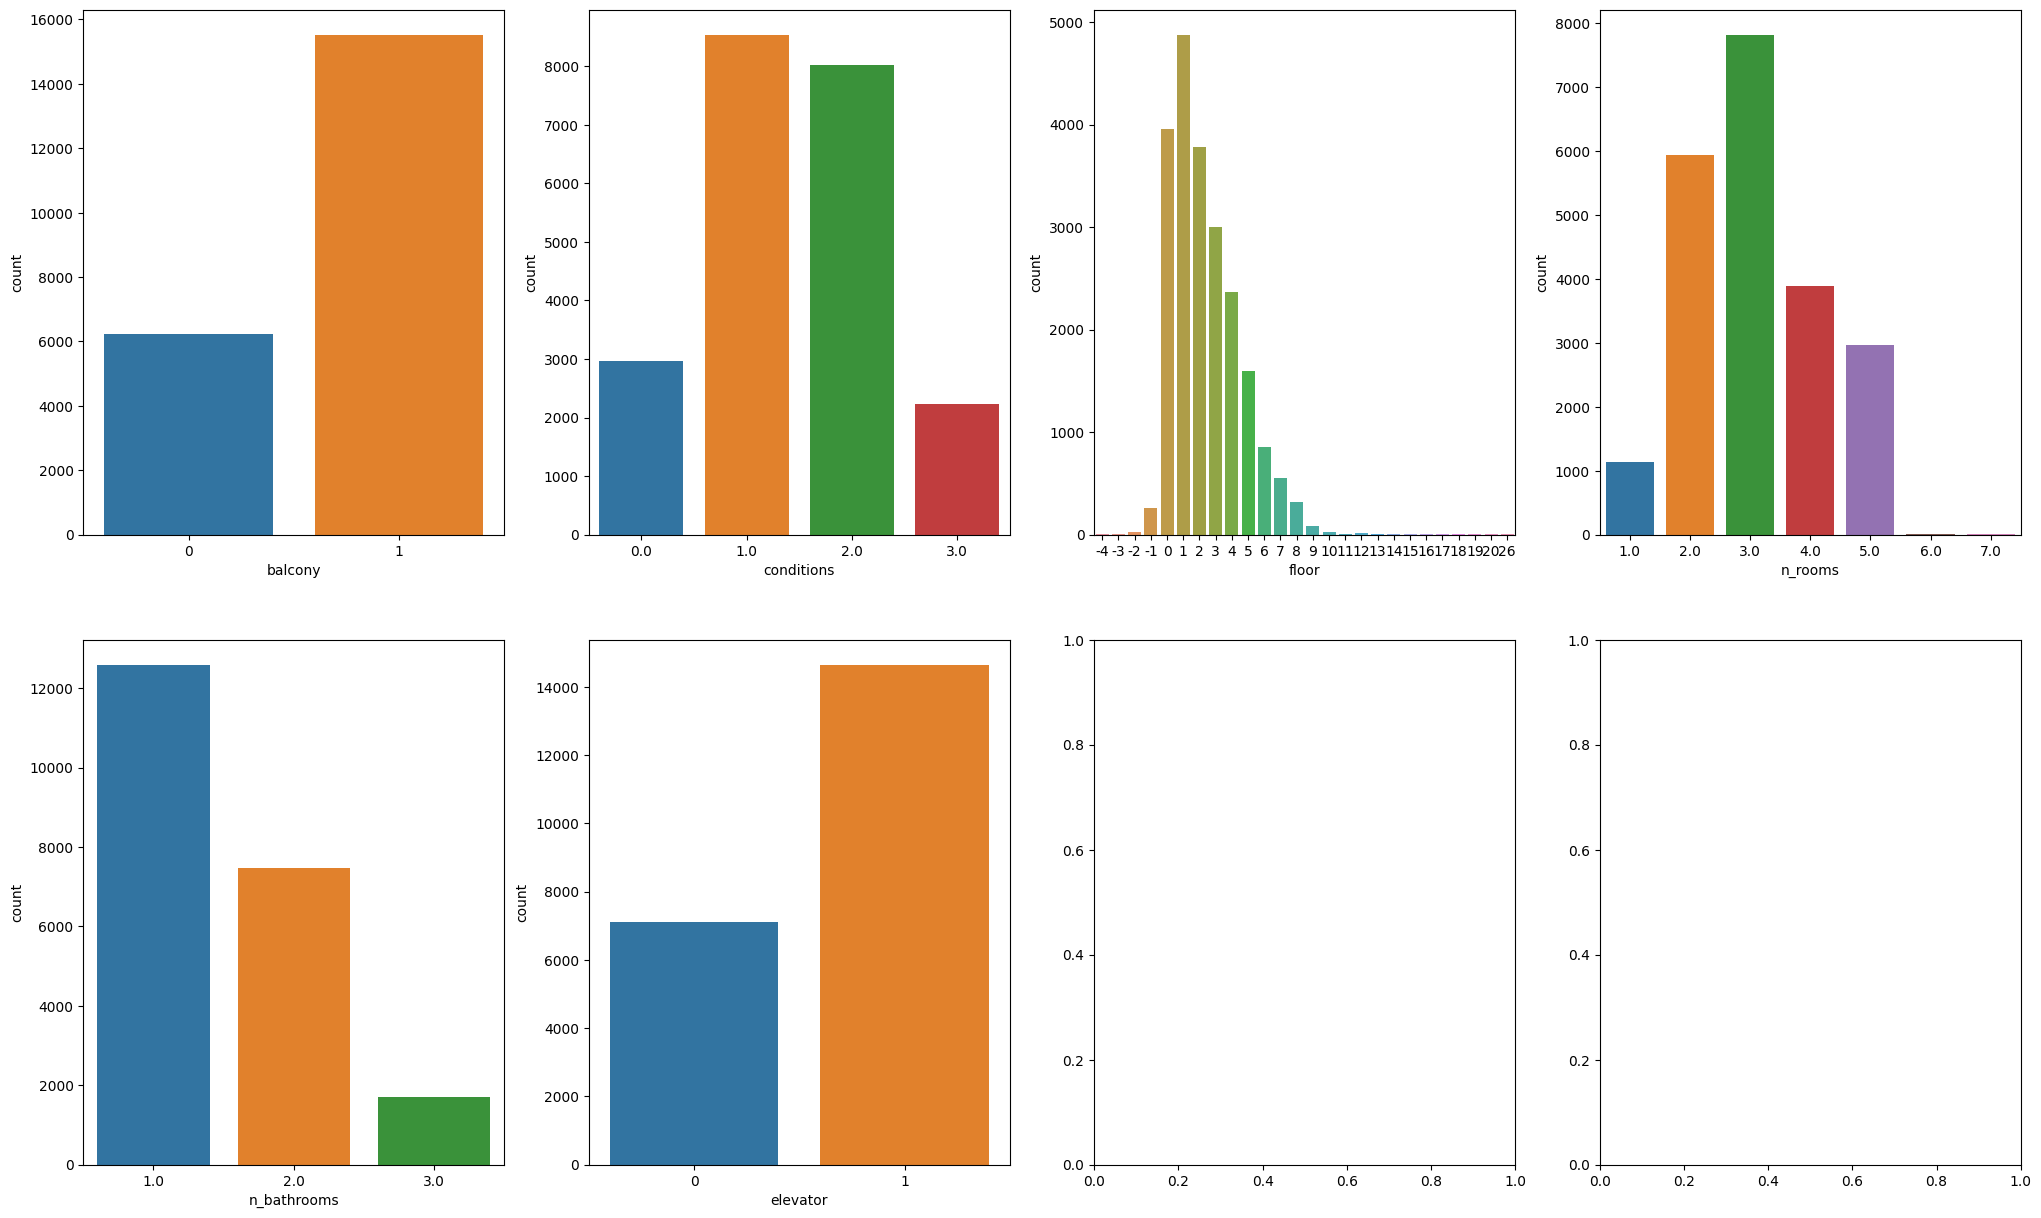

In [ ]:
dummy_vars = ['balcony', 'conditions', 'floor', 'n_rooms', 'n_bathrooms', 'elevator']
fig, ax = plt.subplots(nrows=2,ncols=4, figsize=(25,15))
for i, col in enumerate(dummy_vars):
  if i < 4:
    sns.countplot(data=train_df,
                  x=col,
                  ax=ax[0,i])
  else:
    sns.countplot(data=train_df,
                  x=col,
                  ax=ax[1,i-4])

Clearly the data is extremly inbalanced and high leverage points exist. This means that depedning on how the joint distribution together with the dependent variable is shaped some regrouping might be required, or the use of a model resilient to leverage points. Let's see how the more "continuous" like variables are distributed.

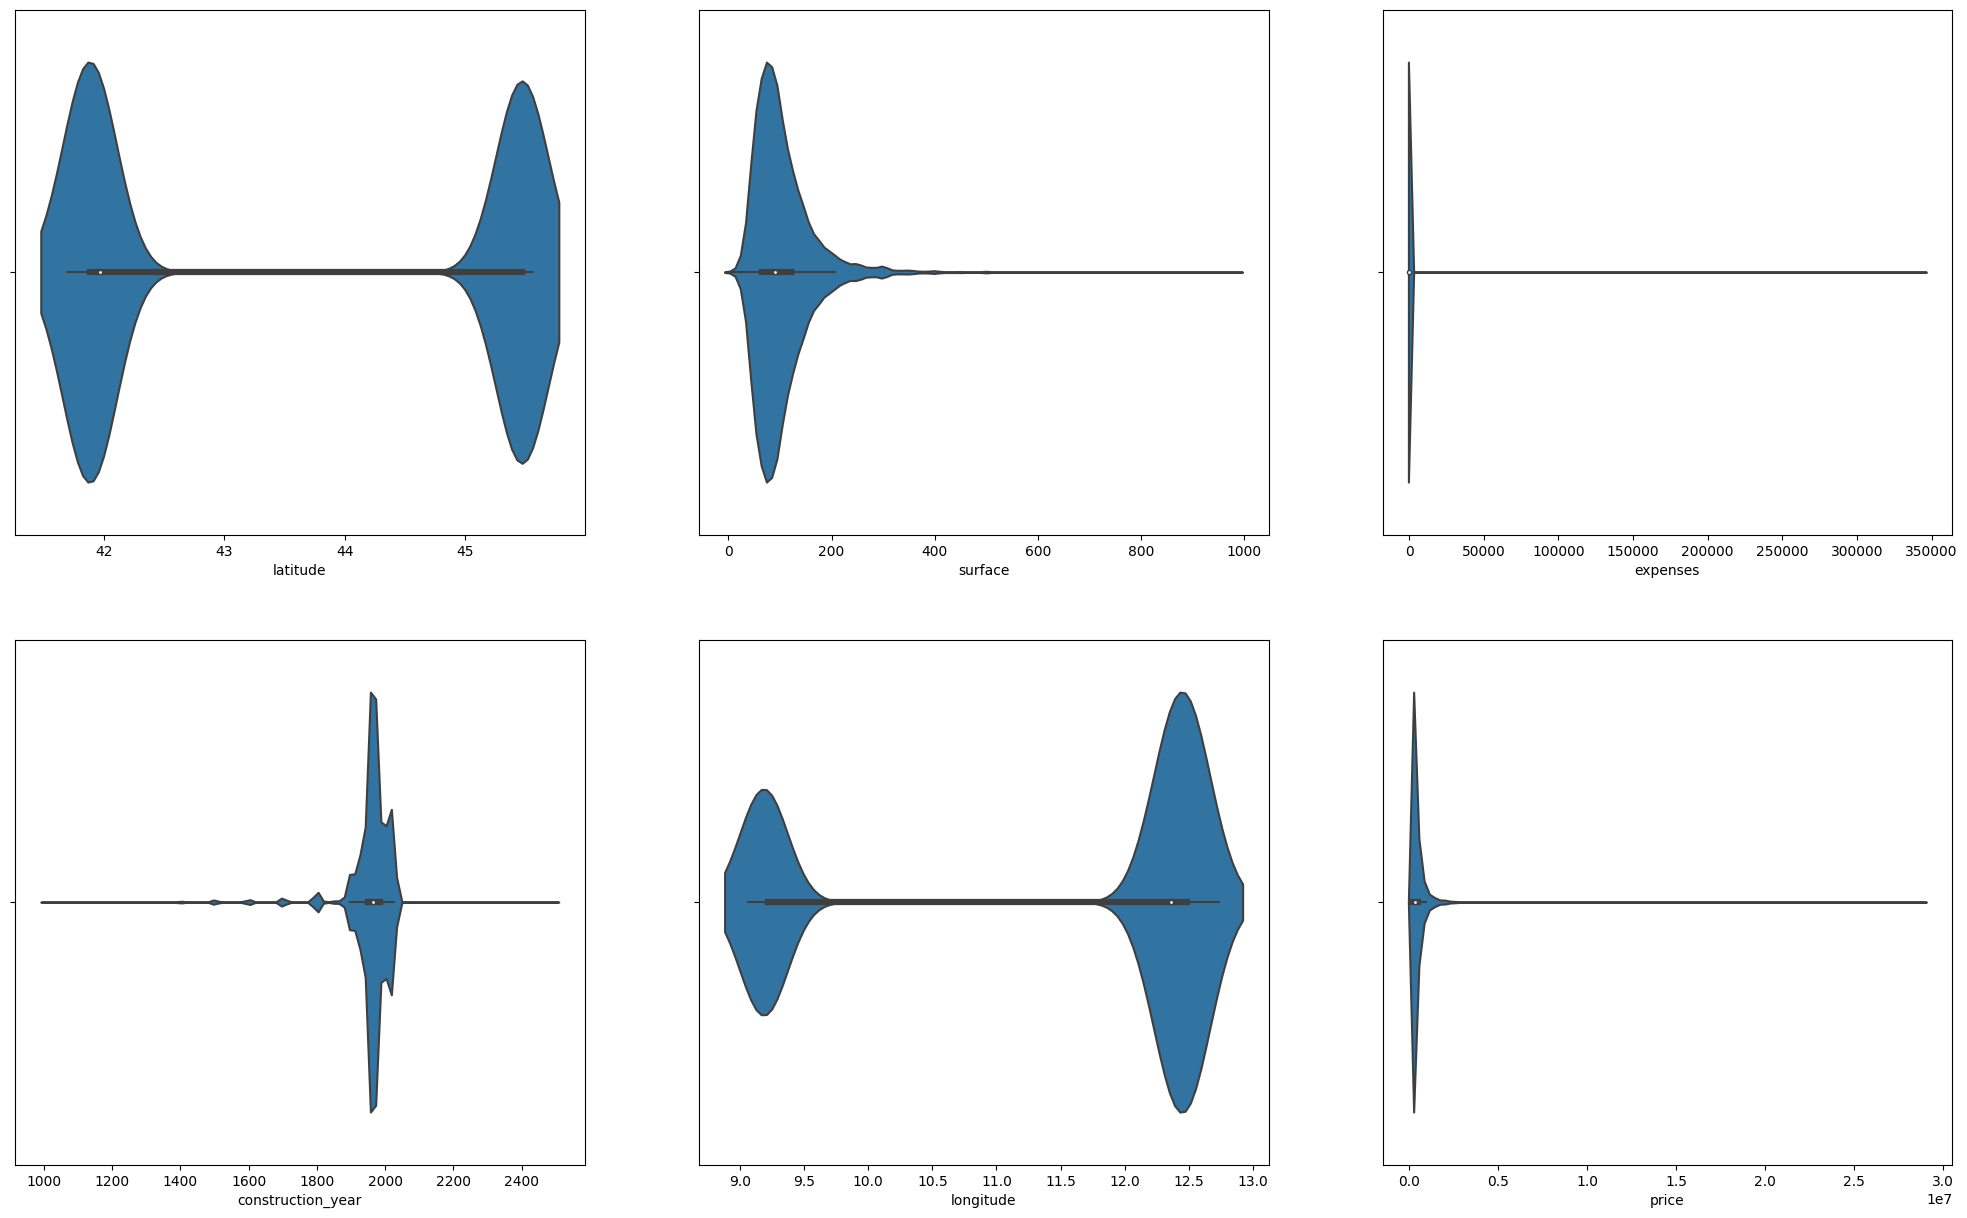

In [ ]:
cont_vars = ['latitude','longitude','expenses','construction_year','surface','price']

fig, ax = plt.subplots(nrows=2,ncols=3, figsize=(25,15))
for i, col in enumerate(cont_vars):
  sns.violinplot(data=train_df,
                x=col,
                scale='count',
                ax=ax[i%2,i%3],
                cut=1)

Clerly, the independent variables have a few that dominate the count. Again some noise reduction may be required. Moreover the dependent variable has some serious outliers, let's see how the distribution looks beyond and before the 90th percentile.

<Axes: xlabel='price'>

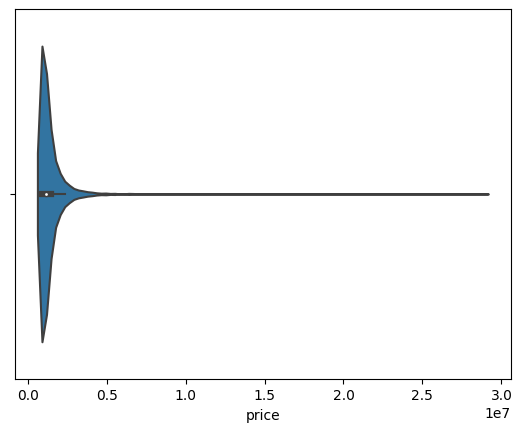

In [ ]:
sns.violinplot(data = train_df[train_df.price > train_df.price.quantile(.90)],
               x='price',
               scale='count',
               cut=1)

<Axes: xlabel='price'>

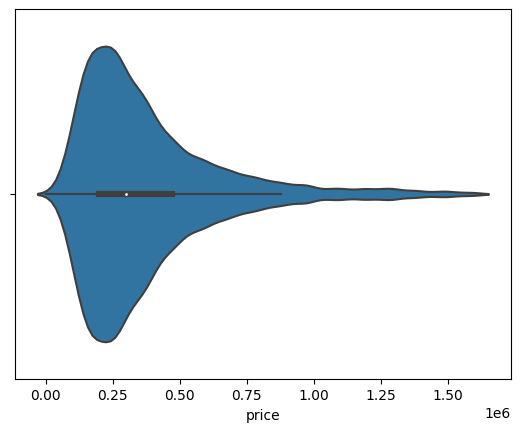

In [ ]:
sns.violinplot(data = train_df[train_df.price < train_df.price.quantile(.98)],
               x='price',
               scale='count',
               cut=1)

In [ ]:
train_df['price'].describe(percentiles=np.arange(0,1,0.1))

count    4.089300e+04
mean     4.227507e+05
std      4.559648e+05
min      6.500000e+02
0%       6.500000e+02
10%      1.380000e+05
20%      1.790000e+05
30%      2.200000e+05
40%      2.590000e+05
50%      3.000000e+05
60%      3.600000e+05
70%      4.350000e+05
80%      5.500000e+05
90%      7.920800e+05
max      2.900000e+07
Name: price, dtype: float64

In [ ]:
train_df['price'].describe(percentiles=np.arange(0.9,1,0.005))

count    4.089300e+04
mean     4.227507e+05
std      4.559648e+05
min      6.500000e+02
50%      3.000000e+05
90%      7.920800e+05
90.5%    8.100000e+05
91%      8.400000e+05
91.5%    8.550000e+05
92%      8.900000e+05
92.5%    9.000000e+05
93%      9.500000e+05
93.5%    9.800000e+05
94%      1.012720e+06
94.5%    1.087940e+06
95%      1.138800e+06
95.5%    1.200000e+06
96%      1.250000e+06
96.5%    1.300000e+06
97%      1.380000e+06
97.5%    1.490000e+06
98%      1.630000e+06
98.5%    1.830000e+06
99%      2.100000e+06
99.5%    2.700000e+06
max      2.900000e+07
Name: price, dtype: float64

In [ ]:
train_df[train_df["price"] < 10000]

price  balcony  conditions  construction_year   latitude  longitude  \
1123    1000        1         2.0                NaN  41.735241  12.259580   
1530    6000        1         2.0                NaN  45.432701  12.333024   
4542    9000        0         1.0             1935.0  41.948335  12.557111   
7132    1000        0         2.0                NaN  45.482689  12.250937   
10757   3900        0         1.0                NaN  45.433700  12.338300   
15605    650        0         1.0                NaN  45.476200  12.197400   
25883   1100        0         2.0             1960.0  45.470700   9.236800   
28782   9000        0         1.0                NaN  45.435260  12.336793   
29349   7000        0         2.0             1800.0  45.425411  12.326890   
29825   6500        0         2.0             1500.0  45.432300  12.333100   
35572   1000        0         2.0                NaN  45.483269  12.252280   
44481   9000        0         1.0                NaN  45.435260  12.336793   

       expenses  floor  n_bathrooms  elevator  n_rooms  surface  
1123      100.0    1.0          1.0         1      3.0     60.0  
1530        NaN    2.0          1.0         1      2.0     42.0  
4542        NaN   -1.0          1.0         0      1.0     11.0  
7132        NaN    2.0          3.0         0      5.0    190.0  
10757      29.0    1.0          1.0         0      1.0     40.0  
15605       0.0    3.0          1.0         0      4.0     80.0  
25883     100.0    0.0          1.0         1      2.0     60.0  
28782       NaN   -1.0          1.0         0      3.0     50.0  
29349      10.0    0.0          1.0         0      1.0     30.0  
29825      20.0    3.0          1.0         1      1.0     23.0  
35572       NaN    0.0          3.0         0      4.0    190.0  
44481       NaN    2.0          1.0         0      3.0     50.0

In [ ]:
train_df = train_df.drop(7734)

In [ ]:
train_df['price'].describe(percentiles=np.arange(0,0.1,0.01))

count    4.089200e+04
mean     4.220519e+05
std      4.335169e+05
min      6.500000e+02
0%       6.500000e+02
1%       6.800000e+04
2%       8.500000e+04
3%       9.500000e+04
4%       1.030000e+05
5%       1.100000e+05
6%       1.180000e+05
7%       1.229370e+05
8%       1.290000e+05
9%       1.320000e+05
50%      3.000000e+05
max      1.420000e+07
Name: price, dtype: float64

In [ ]:
train_df = train_df.drop(train_df[train_df["price"] < 6800].index)

90% of the data is below 792000. the distribution of data points is extremly skewed, with significant outliers. Since the MSE is very sensitive to outliers how we deal with the largest values is very important.

In [ ]:
#10 largest values in dependent variable, left column is index right column is value
train_df['price'].nlargest(10)

38124    14200000
25362    12000000
11407    11000000
24076    10000000
41902     8000000
20464     7500000
102       7000000
1883      7000000
4888      6900000
25233     6600000
Name: price, dtype: int64

In [ ]:
bins = pd.qcut(train_df['price'], 20, retbins=True)
print(bins[1])

[6.5000e+02 1.1000e+05 1.3800e+05 1.5900e+05 1.7900e+05 1.9900e+05
 2.2000e+05 2.4000e+05 2.5900e+05 2.8000e+05 3.0000e+05 3.3000e+05
 3.6000e+05 3.9000e+05 4.3500e+05 4.8900e+05 5.5000e+05 6.5000e+05
 7.9208e+05 1.1388e+06 2.9000e+07]


In [ ]:
train_df[train_df["price"] > 10000000]

price  balcony  conditions  construction_year   latitude  longitude  \
11407  11000000        1         1.0             1900.0  45.467526   9.205022   
25362  12000000        1         1.0             1989.0  45.462794   9.189043   
38124  14200000        1         0.0                NaN  41.926201  12.474100   

       expenses  floor  n_bathrooms  elevator  n_rooms  surface  
11407       1.0    6.0          4.0         1      4.0    601.0  
25362    1000.0    6.0          8.0         1      1.0    626.0  
38124       NaN    3.0          3.0         0      5.0    500.0

In [ ]:
train_df = train_df.drop(25362)

We see that the largest observation is nearly double the second largest and that any value above 1138800 euros falls above the 95th percentile. Since MSE is very sensitive to outliers and majority of the data falls in a much smaller region, we should try to reduce the impact of the outliers we consider to be unimportant. This can be done by weighting those observations less in the model, or by winsorizing values. However the weights are difficult to assign empirically through cross validation, and winsorizing will lead to an increase in density at the furthest tail of our data, chaning the original probability distribution. Instead when fitting the model I will likely drop the largest observation as it is so uncommon, while the other largest points will remain. I winsorized them.  

There are also extreme values in expenses

In [ ]:
train_df.expenses.quantile(0.99)

750.0

<Axes: xlabel='expenses'>

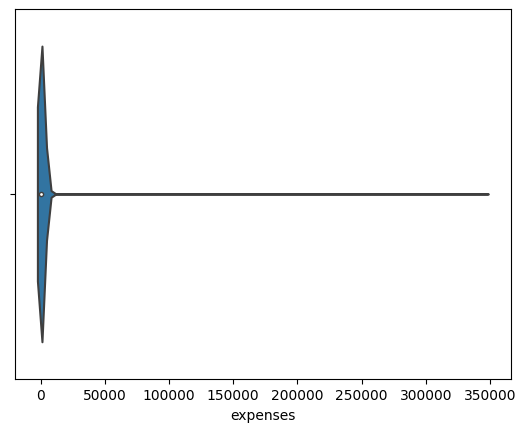

In [ ]:
sns.violinplot(data = train_df[train_df.expenses > train_df.expenses.quantile(0.90)],
               x='expenses',
               scale='count',
               cut=1)

<Axes: xlabel='expenses'>

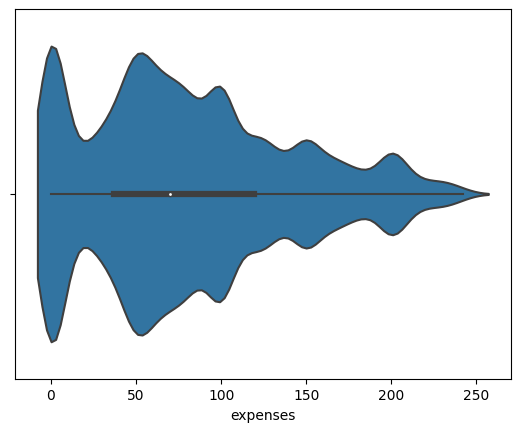

In [ ]:
sns.violinplot(data = train_df[train_df.expenses < train_df.expenses.quantile(.90)],
               x='expenses',
               scale='count',
               cut=1)

In [ ]:
train_df['expenses'].describe(percentiles=np.arange(0,1,0.1))

count     27883.000000
mean        195.272639
std        4086.431244
min           0.000000
0%            0.000000
10%           0.000000
20%          30.000000
30%          50.000000
40%          60.000000
50%          80.000000
60%         100.000000
70%         125.000000
80%         166.000000
90%         250.000000
max      346000.000000
Name: expenses, dtype: float64

In [ ]:
train_df['expenses'].describe(percentiles=np.arange(0.9,1,0.005))

count     27883.000000
mean        195.272639
std        4086.431244
min           0.000000
50%          80.000000
90%         250.000000
90.5%       250.000000
91%         250.000000
91.5%       250.000000
92%         260.000000
92.5%       275.000000
93%         290.000000
93.5%       300.000000
94%         300.000000
94.5%       316.000000
95%         334.000000
95.5%       350.000000
96%         375.000000
96.5%       400.000000
97%         415.000000
97.5%       450.000000
98%         500.000000
98.5%       580.000000
99%         750.000000
99.5%      1300.000000
max      346000.000000
Name: expenses, dtype: float64

90% of the data is below 792000. the distribution of data points is extremly skewed, with significant outliers. Since the MSE is very sensitive to outliers how we deal with the largest values is very important.

In [ ]:
za = train_df.copy()

In [ ]:
train_df = za.copy()

In [ ]:
train_df.loc[train_df["expenses"] <= 10, 'expenses'] = np.nan

In [ ]:
#10 largest values in dependent variable, left column is index right column is value
train_df['expenses'].nlargest(20)

28860    346000.0
45642    290000.0
1863     275000.0
13646    250000.0
31365    230000.0
24365    148000.0
15664    130144.0
24020    116000.0
36472     98000.0
24568     80000.0
27035     20000.0
3847      19167.0
21528     12012.0
20024     12000.0
38030     12000.0
36753     10000.0
36800      9500.0
33655      9033.0
22179      8500.0
31427      7000.0
Name: expenses, dtype: float64

In [ ]:
train_df['expenses'].quantile(.995)

1368.249999999989

There are some really extreme values, lets look at values above 710

In [ ]:
train_df = train_df.drop(train_df[train_df["expenses"] > 1200].index)

In [ ]:
train_df[train_df["expenses"] > 1200]

Empty DataFrame
Columns: [price, balcony, conditions, construction_year, latitude, longitude, expenses, floor, n_bathrooms, elevator, n_rooms, surface]
Index: []

In [ ]:
train_df = train_df[train_df['expenses'] <= 1200]

In [ ]:
train_df[train_df["expenses"]>10000]

Empty DataFrame
Columns: [price, balcony, conditions, construction_year, latitude, longitude, expenses, floor, n_bathrooms, elevator, n_rooms, surface]
Index: []

Most of these houses seem very low value. I will just winsorize these to 99.5th percentile.

In [ ]:
train_df['expenses'].describe(percentiles=np.arange(0.9,1,0.01))

count    23522.000000
mean       126.096378
std        113.524561
min         10.000000
50%        100.000000
90%        250.000000
91%        250.000000
92%        275.000000
93%        299.530000
94%        300.000000
95%        334.000000
96%        370.000000
97%        400.000000
98%        460.000000
99%        580.000000
max       1200.000000
Name: expenses, dtype: float64

looks much better but we also have extreme values in the lower end.

In [ ]:
train_df['expenses'].describe(percentiles=np.arange(0,0.21,0.01))

count    40503.0
mean        15.0
std          0.0
min         15.0
0%          15.0
1%          15.0
2%          15.0
3%          15.0
4%          15.0
5%          15.0
6%          15.0
7%          15.0
8%          15.0
9%          15.0
10%         15.0
11%         15.0
12%         15.0
13%         15.0
14%         15.0
15%         15.0
16%         15.0
17%         15.0
18%         15.0
19%         15.0
20%         15.0
50%         15.0
max         15.0
Name: expenses, dtype: float64

In [ ]:
train_df[(train_df["expenses"] > 10) & (train_df["expenses"] < 30)]

price  balcony  conditions  construction_year   latitude  longitude  \
256    1250000        1         1.0             1500.0  45.437800    12.3408   
259     129000        1         1.0             1950.0  41.846300    12.4350   
286     199000        0         1.0             1980.0  41.964600    12.4420   
295     265000        1         2.0             2010.0  41.856289    12.6533   
312     235000        1         2.0                NaN  41.946600    12.4267   
...        ...      ...         ...                ...        ...        ...   
46189   140000        0         1.0             1950.0  41.920200    12.4589   
46191    80000        0         1.0             1950.0  41.879300    12.5118   
46234   128000        0         1.0                NaN  41.918300    12.5632   
46258   129000        1         2.0             2000.0  41.888700    12.6855   
46283   115000        0         1.0                NaN  41.890400    12.5245   

       expenses  floor  n_bathrooms  elevator  n_rooms  surface  
256        20.0    3.0          3.0         1      5.0    260.0  
259        15.0    0.0          1.0         0      2.0     45.0  
286        25.0    0.0          1.0         0      3.0     65.0  
295        20.0    0.0          2.0         0      4.0    120.0  
312        20.0    3.0          1.0         0      3.0     78.0  
...         ...    ...          ...       ...      ...      ...  
46189      25.0    1.0          1.0         0      1.0     31.0  
46191      16.0    4.0          1.0         0      1.0     37.0  
46234      25.0    0.0          1.0         0      2.0     39.0  
46258      15.0    1.0          1.0         0      3.0     65.0  
46283      20.0    0.0          1.0         1      1.0     30.0  

[925 rows x 12 columns]

In [ ]:
ma = train_df.copy()

In [ ]:
train_df.loc[train_df["construction_year"] > 2025, 'construction_year'] = 2000

In [ ]:
train_df['construction_year'].describe(percentiles=np.arange(0,0.1,0.005))

count    20531.000000
mean      1957.963178
std         58.227399
min       1200.000000
0%        1200.000000
0.5%      1600.000000
1%        1700.000000
1.5%      1800.000000
2%        1800.000000
2.5%      1850.000000
3%        1890.000000
3.5%      1900.000000
4%        1900.000000
4.5%      1900.000000
5%        1900.000000
5.5%      1900.000000
6%        1900.000000
6.5%      1900.000000
7%        1900.000000
7.5%      1900.000000
8%        1910.000000
8.5%      1920.000000
9%        1920.000000
9.5%      1920.000000
50%       1963.000000
max       2025.000000
Name: construction_year, dtype: float64

In [ ]:
train_df.loc[train_df["construction_year"] < 1200, 'construction_year'] = 1200

In [ ]:
train_df = train_df.drop(train_df[train_df["surface"] == 0].index)

## Bivariate Data Exploration

I start by visualizing how the dependent variable's distribution changes within each class below the 99th percentile. I do not consider beyond the 99th percentile for visualization purposes.

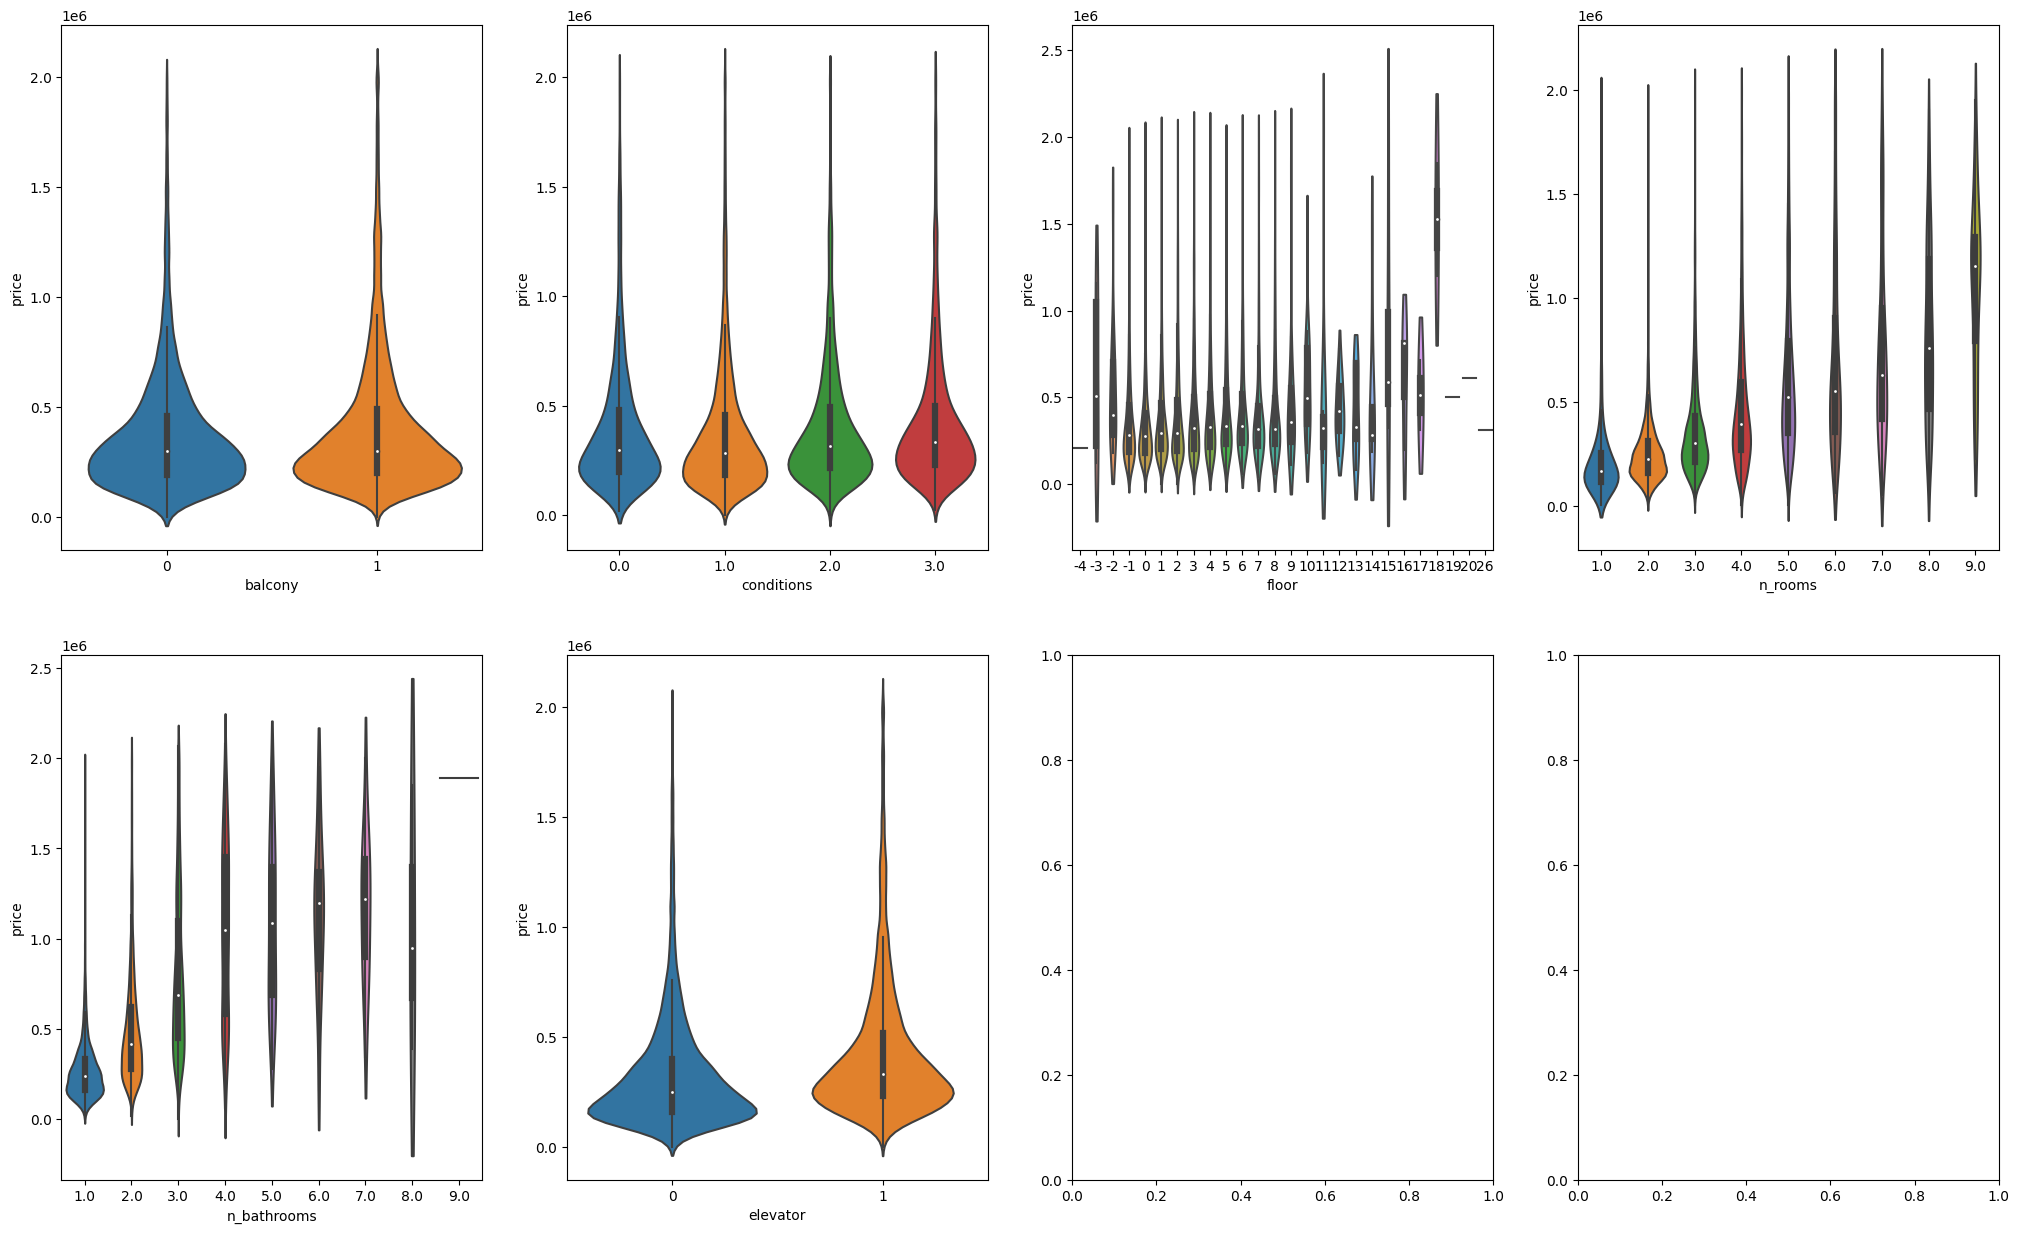

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=4, figsize=(25,15))
for i, col in enumerate(dummy_vars):
  if i < 4:
    sns.violinplot(data=train_df[train_df.price < train_df.price.quantile(.99)],
               y='price',
               x=col,
               cut=1,
               ax=ax[0,i])
  else:
    sns.violinplot(data=train_df[train_df.price < train_df.price.quantile(.99)],
               y='price',
               x=col,
               cut=1,
               ax=ax[1,i-4])

None of the above variables seem to provide reliable indicators of higher prices, perhaps n_rooms and n_bathrooms. A possibility is that some of the floor variables are top heavy and may represent an important predictor depnding on their count.

In [ ]:
for col in dummy_vars:
  print(f'summary statistics for price grouped by {col}')
  print(train_df.groupby(col)['price'].describe().applymap(lambda x: f"{x:0.1f}"))
  print('\n'*2)

summary statistics for price grouped by balcony
           count      mean       std     min       25%       50%       75%  \
balcony                                                                      
0        13032.0  388999.0  355072.3   650.0  190000.0  299000.0  465000.0   
1        27861.0  438538.1  495381.3  1000.0  200000.0  308500.0  495000.0   

                max  
balcony              
0         7000000.0  
1        29000000.0  



summary statistics for price grouped by conditions
              count      mean       std      min       25%       50%  \
conditions                                                             
0.0          5152.0  419634.1  454163.7  18500.0  195000.0  299000.0   
1.0         19497.0  406455.8  489450.1    650.0  185000.0  289000.0   
2.0          9668.0  428523.8  378610.0   1000.0  215000.0  319000.0   
3.0          6576.0  465017.3  455741.8  25000.0  230000.0  339000.0   

                 75%         max  
conditions                   

In [ ]:
floor_counts = train_df['floor'].value_counts().to_dict()
print(floor_counts)

{1.0: 9197, 2.0: 7093, 3.0: 5508, -1.0: 4823, 0.0: 4774, 4.0: 3953, 5.0: 2460, 6.0: 1335, 7.0: 980, 8.0: 389, 9.0: 112, 10.0: 30, -2.0: 26, 12.0: 14, 11.0: 12, 14.0: 9, 13.0: 8, -3.0: 6, 15.0: 4, 16.0: 3, 18.0: 2, 17.0: 2, 26.0: 1, -4.0: 1, 19.0: 1, 20.0: 1}


Clearly the floors with fewer than 12 occurences are quite noisy so I will group them into an "other" category labelled -30. The new high rises are more expensive but this will be encoded in the cy variable.

In [ ]:
train_df[train_df["floor"] == 12]

price  balcony  conditions  construction_year  latitude  longitude  \
1241   396700        1         3.0             2022.0   45.5119    9.13740   
10298  159000        1         1.0             1970.0   41.9065   12.56230   
12108  605000        1         3.0             2022.0   45.4529    9.11670   
12789  199000        1         1.0             1980.0   41.9676   12.51900   
17034  605000        1         3.0             2022.0   45.4433    9.12700   
17088  450000        0         2.0             1950.0   45.4841    9.19720   
20135  440000        0         2.0             1950.0   45.4842    9.19720   
29679  780000        1         1.0             1960.0   41.8245   12.47190   
30571  328000        1         1.0             1979.0   45.5317    9.16750   
31040  305000        1         1.0             1980.0   41.8085   12.48390   
33907  605000        1         3.0             2022.0   45.4433    9.12700   
38563  209000        1         1.0             1980.0   41.9658   12.52280   
44121  310000        1         1.0             1985.0   45.5142    9.15570   
44932  445000        1         3.0                NaN   45.4979    9.17442   

       expenses  floor  n_bathrooms  elevator  n_rooms  surface  
1241        NaN   12.0          2.0         1      3.0     95.0  
10298       NaN   12.0          1.0         1      2.0     46.0  
12108       NaN   12.0          2.0         1      4.0    106.0  
12789      65.0   12.0          2.0         1      3.0     90.0  
17034       NaN   12.0          2.0         1      3.0    106.0  
17088     108.0   12.0          1.0         1      2.0     44.0  
20135     108.0   12.0          1.0         1      2.0     40.0  
29679     200.0   12.0          3.0         1      5.0    220.0  
30571     250.0   12.0          2.0         1      4.0    164.0  
31040      96.0   12.0          2.0         1      4.0    125.0  
33907       NaN   12.0          2.0         1      4.0    106.0  
38563     100.0   12.0          2.0         1      3.0     90.0  
44121     162.0   12.0          2.0         1      4.0    117.0  
44932       NaN   12.0          1.0         1      2.0     70.0

In [ ]:
train_df['floor'] = train_df['floor'].apply(lambda x: 6 if floor_counts[x] < 9 else x)

In [ ]:
floor_counts = train_df['n_rooms'].value_counts()
floor_counts

3.0    14160
2.0    10438
4.0     7512
5.0     5295
1.0     2180
6.0      697
7.0      321
8.0      198
9.0       92
Name: n_rooms, dtype: int64

In [ ]:
bathroom_counts = train_df['n_bathrooms'].value_counts().to_dict()


In [ ]:
train_df[train_df["n_bathrooms"] > 7]

price  balcony  conditions  construction_year   latitude  longitude  \
3434   2200000        1         1.0                NaN  45.440458  12.340130   
6120   4000000        1         1.0                NaN  41.911989  12.470886   
8371   1850000        1         3.0                NaN  45.434068  12.334472   
19903  1890000        0         1.0                NaN  41.883913  12.432006   
20386   950000        0         3.0             1800.0  41.895677  12.489130   
25734   390000        1         3.0             1920.0  41.905680  12.482206   
26079  3000000        1         1.0                NaN  41.818395  12.558407   
37390  4800000        1         1.0                NaN  41.944340  12.450056   
38781  2700000        1         3.0             1980.0  42.023978  12.359475   
43172  2350000        1         1.0             1978.0  41.948340  12.449303   
45846  2100000        0         1.0                NaN  42.014335  12.538076   
46108  3500000        1         3.0             1800.0  45.440343  12.336757   

       expenses  floor  n_bathrooms  elevator  n_rooms  surface  
3434        NaN    2.0          9.0         0      1.0    410.0  
6120        NaN   -1.0          9.0         1      2.0    770.0  
8371        NaN   -1.0          8.0         0      1.0    320.0  
19903       NaN    3.0          9.0         0      1.0    595.0  
20386       NaN    3.0          8.0         0      1.0    250.0  
25734       NaN    1.0          8.0         0      8.0    250.0  
26079       NaN    4.0          9.0         0      9.0    805.0  
37390       NaN    4.0          9.0         0      1.0      0.0  
38781       NaN   -1.0          8.0         0      2.0    100.0  
43172    1100.0    2.0          8.0         0      3.0    640.0  
45846       NaN    2.0          9.0         0      1.0    800.0  
46108       NaN    2.0          8.0         0      8.0    500.0

Let's see how the new transformations look

In [ ]:
train_df.loc[train_df['n_bathrooms'] > 8, 'n_bathrooms'] = 8

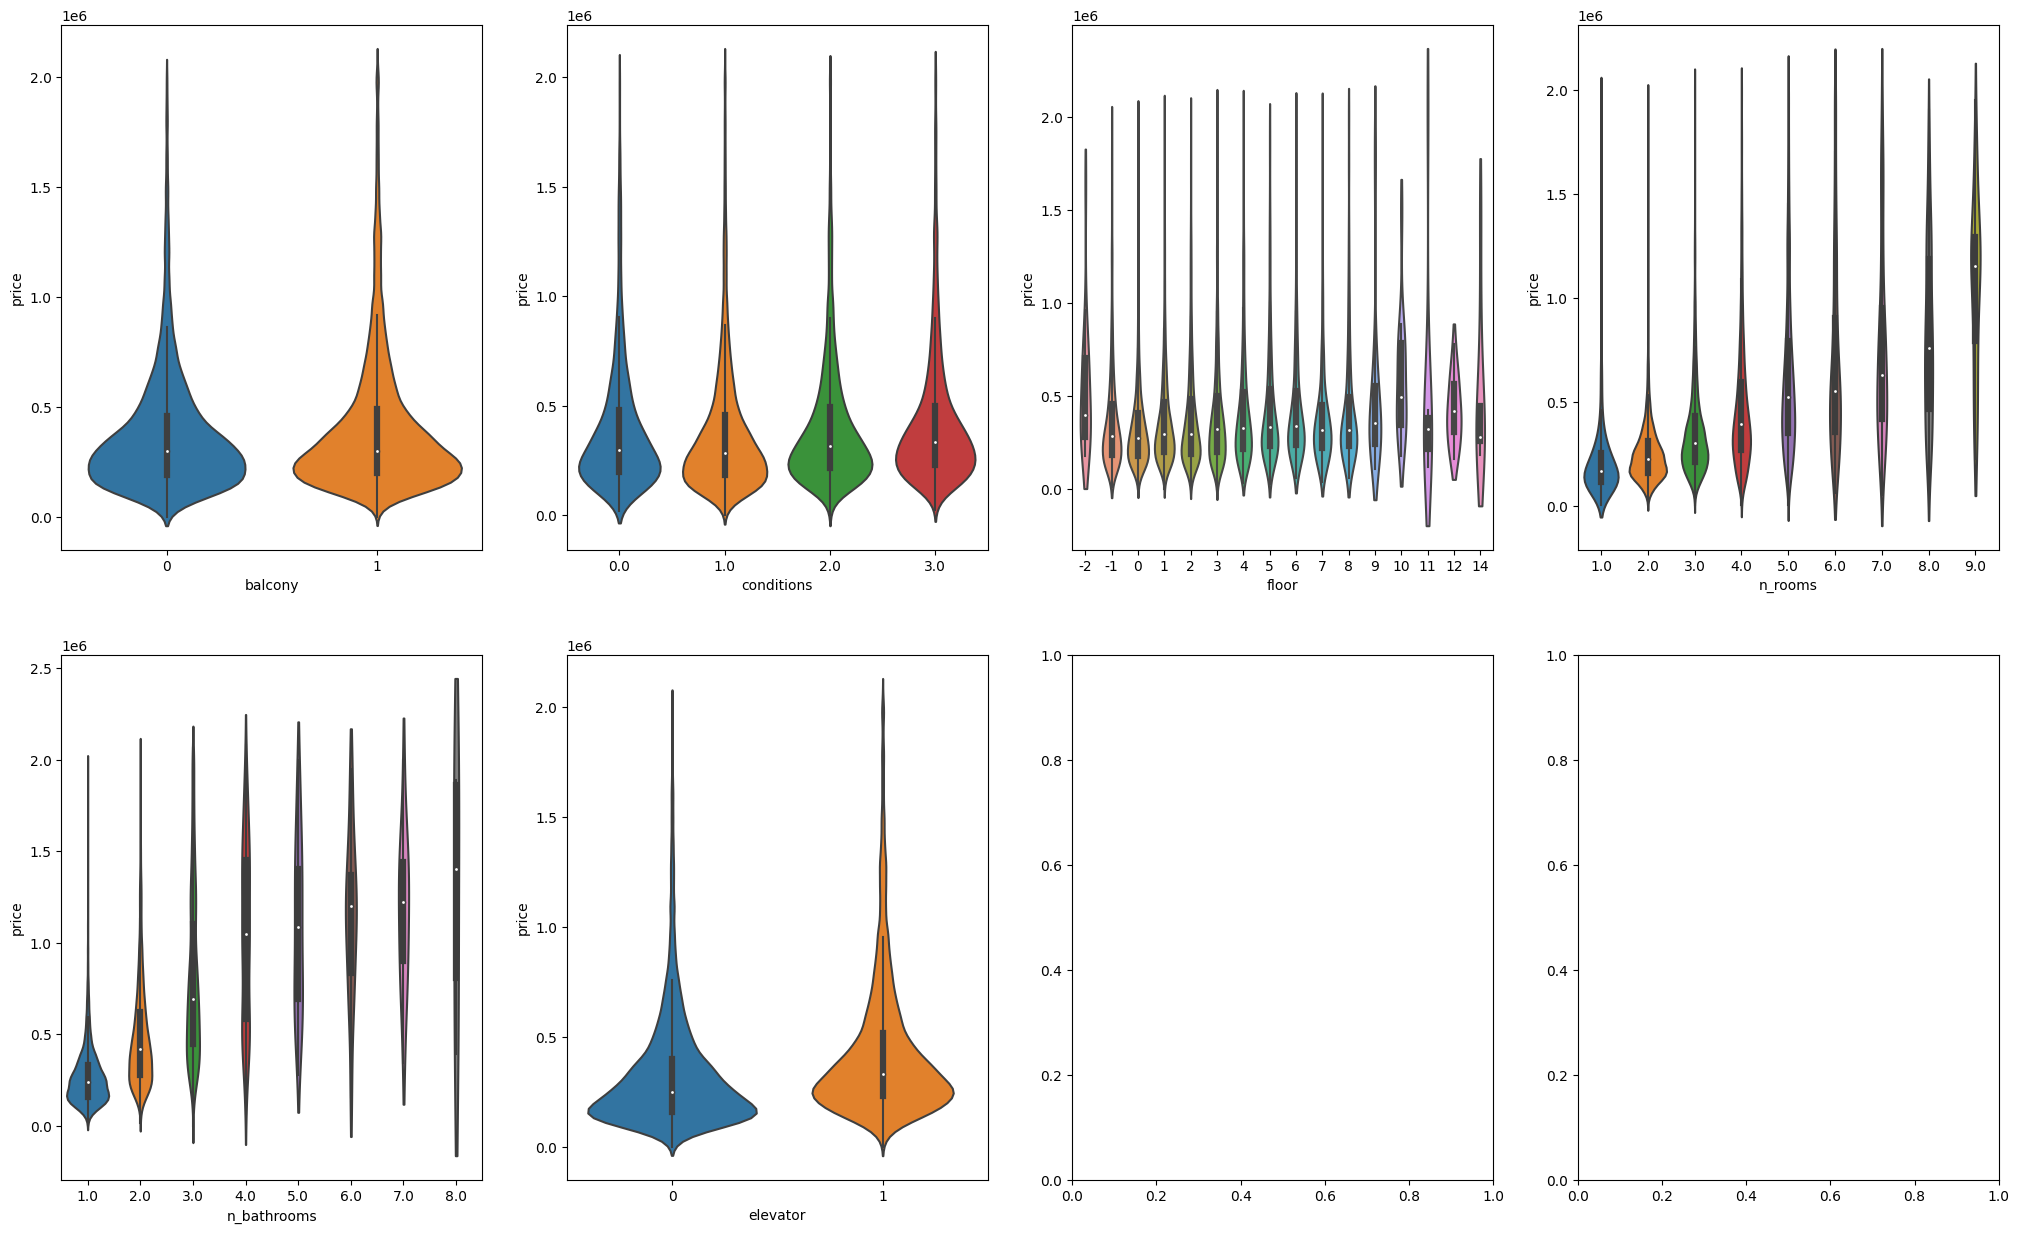

In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=4, figsize=(25,15))
for i, col in enumerate(dummy_vars):
  if i < 4:
    sns.violinplot(data=train_df[train_df.price < train_df.price.quantile(.99)],
               y='price',
               x=col,
               cut=1,
               ax=ax[0,i])
  else:
    sns.violinplot(data=train_df[train_df.price < train_df.price.quantile(.99)],
               y='price',
               x=col,
               cut=1,
               ax=ax[1,i-4])

I also take a look at the grouped summary statistics for each of the variables

In [ ]:
for col in dummy_vars:
  print(f'summary statistics for price grouped by {col}')
  print(train_df.groupby(col)['price'].describe().applymap(lambda x: f"{x:0.1f}"))
  print('\n'*2)

summary statistics for price grouped by balcony
           count      mean       std     min       25%       50%       75%  \
balcony                                                                      
0        13032.0  388999.0  355072.3   650.0  190000.0  299000.0  465000.0   
1        27861.0  438538.1  495381.3  1000.0  200000.0  308500.0  495000.0   

                max  
balcony              
0         7000000.0  
1        29000000.0  



summary statistics for price grouped by conditions
              count      mean       std      min       25%       50%  \
conditions                                                             
0.0          5152.0  419634.1  454163.7  18500.0  195000.0  299000.0   
1.0         19497.0  406455.8  489450.1    650.0  185000.0  289000.0   
2.0          9668.0  428523.8  378610.0   1000.0  215000.0  319000.0   
3.0          6576.0  465017.3  455741.8  25000.0  230000.0  339000.0   

                 75%         max  
conditions                   

It seems that in general the distributions of the data dont drastically change across the dummy variables apart from rooms and bathrooms, some findings are the following:


1.   More bathrooms and rooms generally mean higher prices, as expected.
<!-- 2.   Counter intuitively, low priority jobs are resolved quicker, this may be because those jobs are "easier" by nature
3.   Their does not seem to be a significant difference in time on average for forwarded jobs, while the standard deviatioins are different this is due to outliers and in fact the 25, 50 and 75th percentiles match up closely
4.   The quickest channel in general seems to be the telephone
6.   The month variable is distributed very similarly across each despite counts increasing drastically in March. 
5.   Tickets opened out of working hours seem to take longer to resolve as expected, this variable seems to be a strong predictor based on the summary statistics -->

Next I take a look at the more populated variables, I omit plotting the contingency tables as there are many variables and it would become quite messy to read.

In [ ]:
cont_vars

['latitude', 'longitude', 'expenses', 'construction_year', 'surface', 'price']

In [ ]:
cont = ["expenses", "construction_year", "surface", "price"]

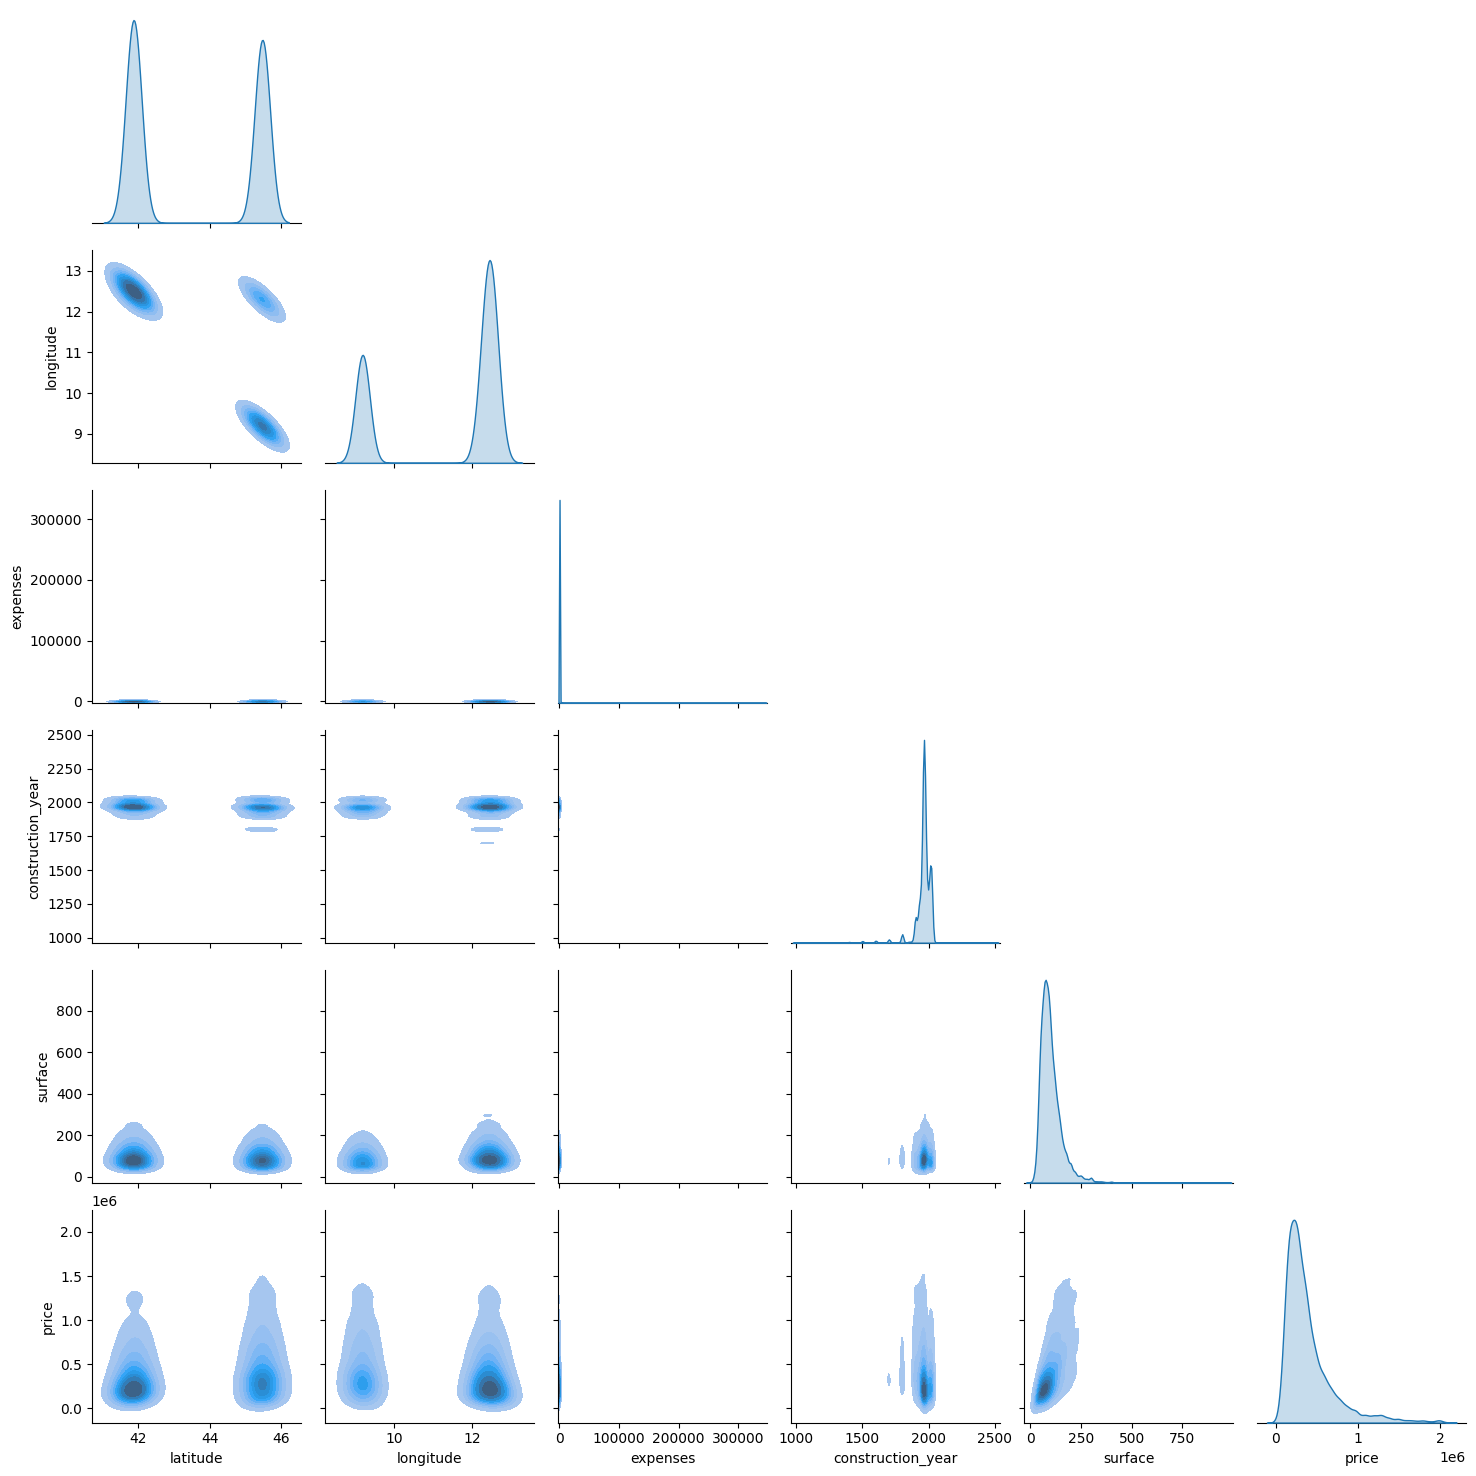

In [ ]:
sns.pairplot(train_df[train_df.price < train_df.price.quantile(.99)], 
             kind='kde',
             x_vars=cont_vars,
             y_vars=cont_vars,
             corner = True,
             plot_kws=dict(fill=True))

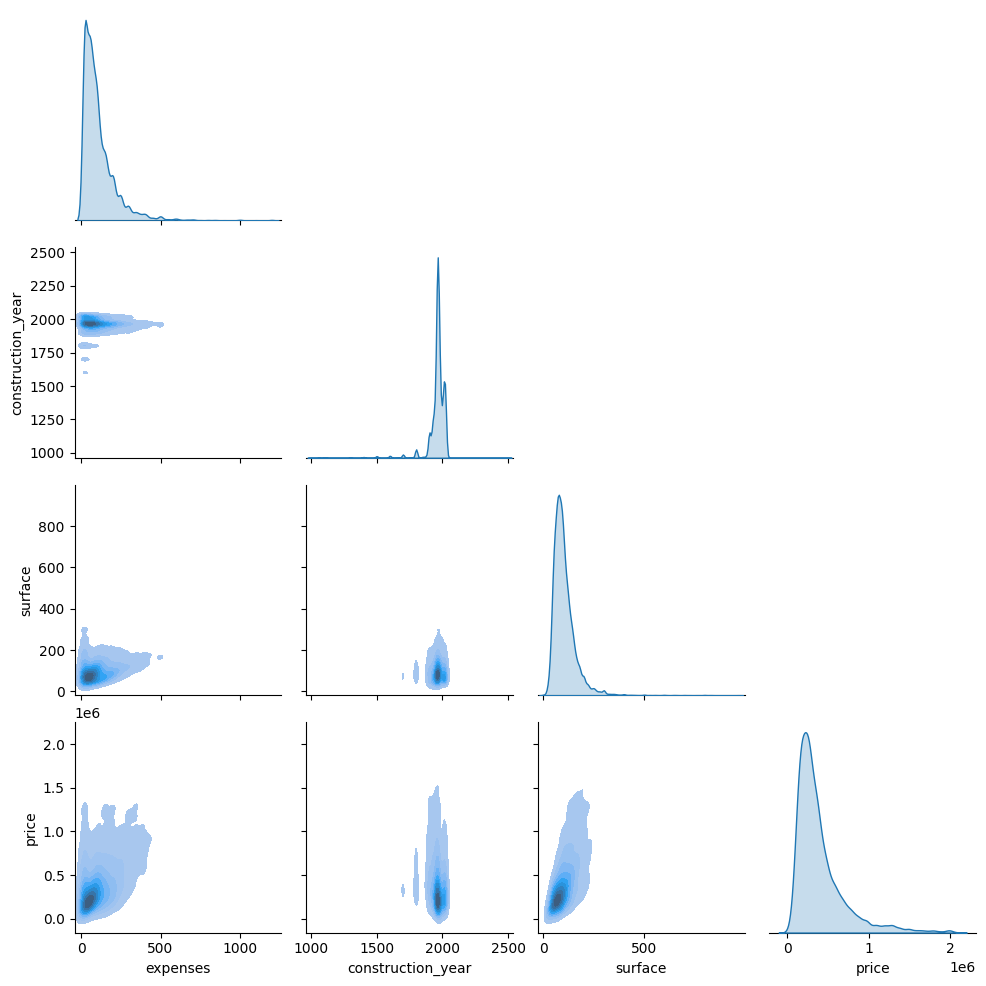

In [ ]:
sns.pairplot(train_df[train_df.price < train_df.price.quantile(.99)], 
             kind='kde',
             x_vars=cont,
             y_vars=cont,
             corner = True,
             plot_kws=dict(fill=True))

We don't see any clear relationship here.

In the joint distributions with the dependent variable there does not seem to be any clear predictors of the extreme values, which is a negative since outliers will quickly explode the MSE if we cannot predict them well. We see that predictor variables with higher volumes are linked to extreme values, as is statisitically expected. Meanwhile, the values of less frequent predictors are concentrated around the lower quantiles of the dependent variable. This suggests that the dimensionality of these predictors can be effectively reduced by grouping those with fewer counts into one bin and letting majoirty of the variability be explained by more frequent variables.

In [ ]:
tr

price  balcony  conditions  construction_year   latitude  longitude  \
0        60000        1         1.0             1980.0  41.901300  12.700000   
1       900000        0         1.0                NaN  41.907017  12.481311   
2        33000        0         1.0             1960.0  41.976500  12.440500   
3       166000        0         2.0                NaN  45.484800  12.198200   
4       410000        1         1.0                NaN  45.424480  12.328622   
...        ...      ...         ...                ...        ...        ...   
46306  2260000        1         1.0             1950.0  45.470800   9.197000   
46307   329999        1         1.0             1929.0  41.923500  12.446100   
46308   599000        1         0.0             1920.0  41.916743  12.454925   
46310   189000        1         1.0             1965.0  45.445605   9.245942   
46311   355000        1         2.0             1970.0  41.877000  12.431400   

       expenses  floor  n_bathrooms  elevator  n_rooms  surface  
0          30.0    2.0          1.0         0      1.0     35.0  
1           NaN    3.0          1.0         1      3.0    131.0  
2          30.0    4.0          1.0         0      1.0     16.0  
3           NaN    1.0          1.0         0      2.0    100.0  
4           NaN    3.0          2.0         1      3.0     90.0  
...         ...    ...          ...       ...      ...      ...  
46306     580.0    2.0          2.0         1      5.0    180.0  
46307      35.0    3.0          1.0         0      3.0     88.0  
46308     170.0    6.0          2.0         1      5.0    189.0  
46310     150.0   -1.0          1.0         1      3.0     70.0  
46311     100.0    1.0          1.0         1      4.0    101.0  

[40893 rows x 12 columns]

In [ ]:
train_idx = []  # the index values to be used for training
previous = 0
np.random.seed(40)

for i, quantile in enumerate(np.arange(0.001, 1.001, .001)):
    if i == 0:
        temp = train_df[train_df['price'] <= train_df['price'].quantile(quantile)].copy()
        train_idx.extend(list(temp.sample(frac=0.8).index))
    else:
        temp = train_df[(train_df['price'] > train_df['price'].quantile(previous)) \
                          & (train_df['price'] <= train_df['price'].quantile(quantile))].copy()
        train_idx.extend(list(temp.sample(frac=0.8).index))
    previous = quantile

X_train = train_df.loc[train_idx].drop('price', axis=1)
y_train = train_df.loc[train_idx]['price']
X_val = train_df.loc[set(train_df.index) - set(train_idx)].drop('price', axis=1)
y_val = train_df.loc[set(train_df.index) - set(train_idx)]['price']

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


In [ ]:
from xgboost import XGBRegressor

Mean Squared Error: 26229993414.192593


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


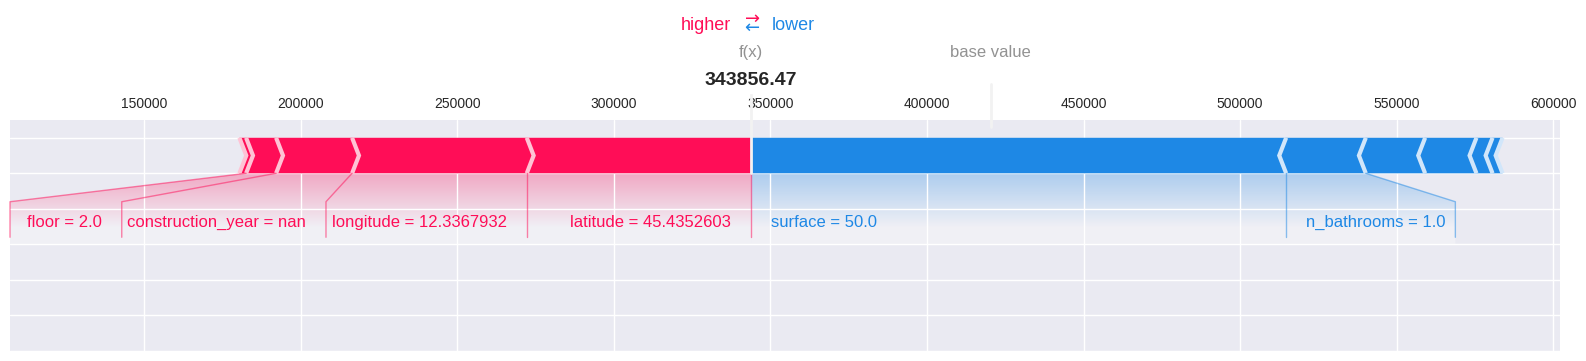

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


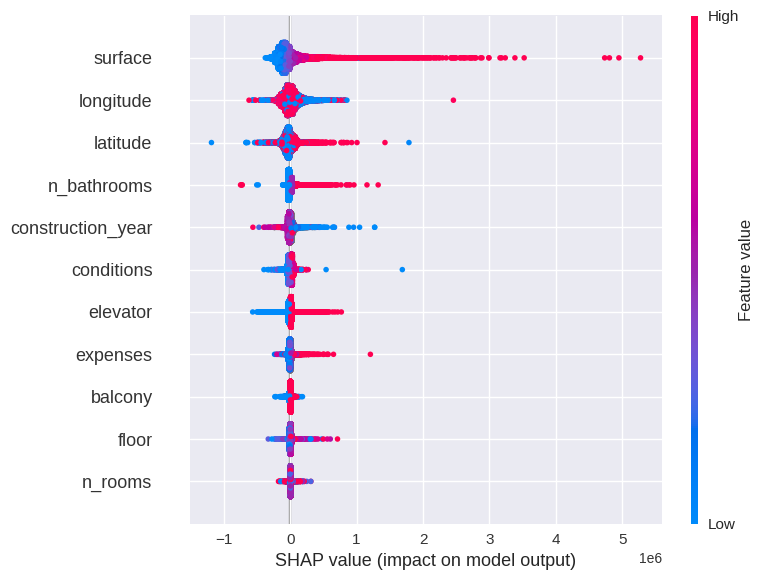

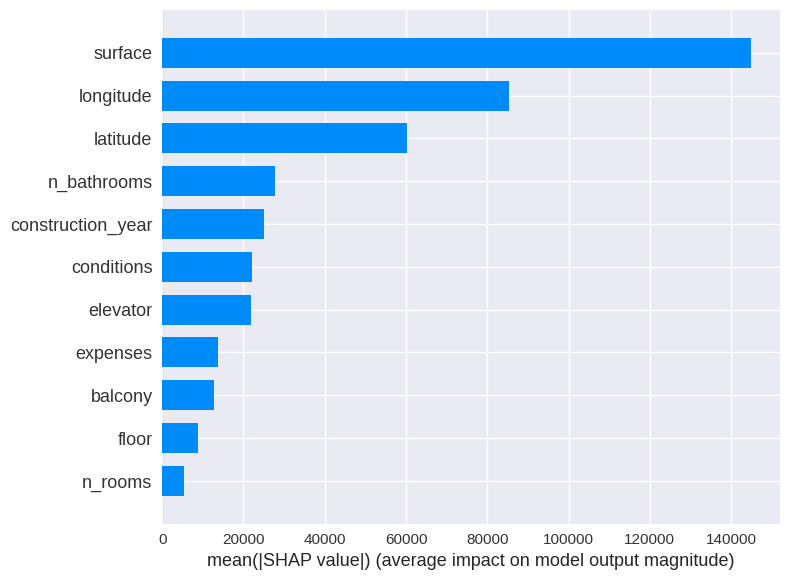

In [ ]:
# XGBOst
xgb = XGBRegressor(objective="reg:squarederror")
# Train the model
xgb.fit(X_train, y_train)
# Make predictions on the validation set
y_pred = xgb.predict(X_val)
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)
shap.initjs()


# tree = DecisionTreeRegressor()

# # Train the model
# tree.fit(X_train, y_train)

# # Make predictions on the validation set
# y_pred = tree.predict(X_val)

# # Calculate mean squared error (MSE)
# mse = mean_squared_error(y_val, y_pred)

# print("Mean Squared Error:", mse)

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)
#Force plot shows how independent variables affect the output values and the magnitude
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:], matplotlib=True)
#Summary plots give an overview of feature importance
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar')


In [ ]:
tro = train_df.copy()

In [ ]:
train_df

price  balcony  conditions  construction_year   latitude  longitude  \
0        60000        1         1.0             1980.0  41.901300  12.700000   
1       900000        0         1.0                NaN  41.907017  12.481311   
2        33000        0         1.0             1960.0  41.976500  12.440500   
3       166000        0         2.0                NaN  45.484800  12.198200   
4       410000        1         1.0                NaN  45.424480  12.328622   
...        ...      ...         ...                ...        ...        ...   
46306  2260000        1         1.0             1950.0  45.470800   9.197000   
46307   329999        1         1.0             1929.0  41.923500  12.446100   
46308   599000        1         0.0             1920.0  41.916743  12.454925   
46310   189000        1         1.0             1965.0  45.445605   9.245942   
46311   355000        1         2.0             1970.0  41.877000  12.431400   

       expenses  floor  n_bathrooms  elevator  n_rooms  surface  
0          30.0    2.0          1.0         0      1.0     35.0  
1           NaN    3.0          1.0         1      3.0    131.0  
2          30.0    4.0          1.0         0      1.0     16.0  
3           NaN    1.0          1.0         0      2.0    100.0  
4           NaN    3.0          2.0         1      3.0     90.0  
...         ...    ...          ...       ...      ...      ...  
46306     580.0    2.0          2.0         1      5.0    180.0  
46307      35.0    3.0          1.0         0      3.0     88.0  
46308     170.0    6.0          2.0         1      5.0    189.0  
46310     150.0   -1.0          1.0         1      3.0     70.0  
46311     100.0    1.0          1.0         1      4.0    101.0  

[40744 rows x 12 columns]

#Imputation using random forest for construction_year and expenses.

In [ ]:
train_df.isna().sum()

price                   0
balcony                 0
conditions              0
construction_year    2991
latitude                0
longitude               0
expenses                0
floor                   0
n_bathrooms             0
elevator                0
n_rooms                 0
surface                 0
dtype: int64

In [ ]:
train_imp = train_df.drop("price", axis = 1)

In [ ]:
train_impexp = train_imp.drop("construction_year", axis = 1)

In [ ]:
train_impcy = train_imp.drop("expenses", axis = 1)

In [ ]:
train_impcy.isna().sum()

balcony                  0
conditions               0
construction_year    11165
latitude                 0
longitude                0
floor                    0
n_bathrooms              0
elevator                 0
n_rooms                  0
surface                  0
dtype: int64

In [ ]:
train_impexp1 = train_impexp.dropna(subset=['expenses'])

In [ ]:
y_impexp1 = train_impexp1["expenses"]

In [ ]:
x_impexp1 = train_impexp1.drop("expenses", axis = 1)

In [ ]:
missing_expenses = train_impexp[train_impexp["expenses"].isna()].drop("expenses", axis = 1)

In [ ]:
missing_expenses

balcony  conditions   latitude  longitude  floor  n_bathrooms  \
1            0         1.0  41.907017  12.481311    3.0          1.0   
3            0         2.0  45.484800  12.198200    1.0          1.0   
4            1         1.0  45.424480  12.328622    3.0          2.0   
5            0         1.0  41.874581  12.541382   -1.0          1.0   
11           1         1.0  45.435364  12.324397    2.0          2.0   
...        ...         ...        ...        ...    ...          ...   
46293        1         1.0  41.735800  12.259400    5.0          1.0   
46294        0         1.0  41.877600  12.530500    1.0          2.0   
46298        1         0.0  41.927500  12.416100    3.0          1.0   
46299        1         3.0  45.455367   9.152546    5.0          2.0   
46301        1         1.0  41.933699  12.443048    4.0          1.0   

       elevator  n_rooms  surface  
1             1      3.0    131.0  
3             0      2.0    100.0  
4             1      3.0     90.0  
5             0      2.0     30.0  
11            0      5.0    135.0  
...         ...      ...      ...  
46293         1      2.0     56.0  
46294         1      3.0     92.0  
46298         0      3.0     83.0  
46299         1      3.0    140.0  
46301         0      2.0     67.0  

[17072 rows x 9 columns]

In [ ]:
train_impcy1 = train_impcy.dropna(subset = ["construction_year"])
y_impcy1 = train_impcy1["construction_year"]
x_impcy1 = train_impcy1.drop("construction_year", axis = 1)

In [ ]:
missing_cy = train_impcy[train_impcy["construction_year"].isna()].drop("construction_year", axis = 1)

In [ ]:
train_idx = []  # the index values to be used for training
previous = 0
np.random.seed(40)

for i, quantile in enumerate(np.arange(0.001, 1.001, .001)):
    if i == 0:
        temp = train_impcy1[train_impcy1['construction_year'] <= train_impcy1['construction_year'].quantile(quantile)].copy()
        train_idx.extend(list(temp.sample(frac=0.8).index))
    else:
        temp = train_impcy1[(train_impcy1['construction_year'] > train_impcy1['construction_year'].quantile(previous)) \
                          & (train_impcy1['construction_year'] <= train_impcy1['construction_year'].quantile(quantile))].copy()
        train_idx.extend(list(temp.sample(frac=0.8).index))
    previous = quantile

X_train = train_impcy1.loc[train_idx].drop('construction_year', axis=1)
y_train = train_impcy1.loc[train_idx]['construction_year']
X_val = train_impcy1.loc[set(train_impcy1.index) - set(train_idx)].drop('construction_year', axis=1)
y_val = train_impcy1.loc[set(train_impcy1.index) - set(train_idx)]['construction_year']

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


In [ ]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
config = {
    "method": "random",
    "metric": {
      "name": "mse",
      "goal": "minimize"   
        },
    "parameters": { 
        "criterion": {
            "value": 'squared_error' 
            },
        "n_estimators": {
            "distribution": "q_log_uniform",
            "min": 3,
            "max": 6,
            "q": 1
            },
        "min_samples_split": {
            "distribution": 'q_uniform',
            "min": 2,
            "max": 8,
            "q": 1
            },
        "min_samples_leaf": {
            "distribution": 'q_uniform',
            "min": 1,
            "max": 8,
            "q": 1
            },
        "max_samples": {
            "distribution": 'uniform',
            "min": 0.3,
            "max": 1,
            },
        "min_impurity_decrease": {
            "distribution": 'uniform',
            "min": 0,
            "max": 10,
            },
        "max_depth": {
            "distribution": 'q_uniform',
            "min": 1,
            "max": 8,
            "q": 1
            }
          }
        }
        

Define main training loop

In [ ]:
def train_rf():
  config_defaults = {"criterion" : 'gini',
                     "n_estimators" : 100,
                     "min_samples_split" : 1,
                     "min_samples_leaf" : 1,
                     "max_samples" : 1,
                     "min_impurity_decrease" : 1,
                     "max_depth" : 1
                     }

  wandb.init(config=config_defaults, resume=False)  # defaults are over-ridden during the sweep
  config = wandb.config

  #update parameters
  params = {"criterion": config.criterion,
            "n_estimators": config.n_estimators,
            "min_samples_split": config.min_samples_split,
            "min_samples_leaf": config.min_samples_leaf,
            "max_samples": config.max_samples,
            "min_impurity_decrease": config.min_impurity_decrease,
            "max_depth": config.max_depth
        }
  
  #instantiate and fit the model
  model = RandomForestRegressor(**params)
  model.fit(X_train, y_train)

  #predict
  preds = model.predict(X_val)

  #score
  mse = mean_squared_error(y_val, preds)

  #log the score to weights and biases
  wandb.log({"mse": mse})

Initalize weights and biases agent for this model and begin training

In [ ]:
os.environ["WANDB_SILENT"] = "true" #keep training silet to prevent notebook lag
sweep_id = wandb.sweep(config, project="ML_project_rf_model") #generate sweep id
wandb.agent(sweep_id, train_rf, project="ML_project_rf_model") #launch sweeep

Create sweep with ID: uabffyjg
Sweep URL: https://wandb.ai/aebelge/ML_project_rf_model/sweeps/uabffyjg


In [ ]:
params = {
    "criterion": "squared_error",
    "max_depth": 7,
    "max_samples": 0.8885949560316397,
    "min_impurity_decrease": 3.518336599426708,
    "min_samples_leaf": 6,
    "min_samples_split": 4,
    "n_estimators": 82
}


In [ ]:
modelexp = RandomForestRegressor(**params)
modelexp.fit(x_impexp1,y_impexp1)

preds = modelexp.predict(missing_expenses)

In [ ]:
len(preds)


17072

In [ ]:
missing_expenses

balcony  conditions   latitude  longitude  floor  n_bathrooms  \
1            0         1.0  41.907017  12.481311    3.0          1.0   
3            0         2.0  45.484800  12.198200    1.0          1.0   
4            1         1.0  45.424480  12.328622    3.0          2.0   
5            0         1.0  41.874581  12.541382   -1.0          1.0   
11           1         1.0  45.435364  12.324397    2.0          2.0   
...        ...         ...        ...        ...    ...          ...   
46293        1         1.0  41.735800  12.259400    5.0          1.0   
46294        0         1.0  41.877600  12.530500    1.0          2.0   
46298        1         0.0  41.927500  12.416100    3.0          1.0   
46299        1         3.0  45.455367   9.152546    5.0          2.0   
46301        1         1.0  41.933699  12.443048    4.0          1.0   

       elevator  n_rooms  surface  
1             1      3.0    131.0  
3             0      2.0    100.0  
4             1      3.0     90.0  
5             0      2.0     30.0  
11            0      5.0    135.0  
...         ...      ...      ...  
46293         1      2.0     56.0  
46294         1      3.0     92.0  
46298         0      3.0     83.0  
46299         1      3.0    140.0  
46301         0      2.0     67.0  

[17072 rows x 9 columns]

In [ ]:
train_impexp

balcony  conditions   latitude  longitude  expenses  floor  \
0            1         1.0  41.901300  12.700000      30.0    2.0   
1            0         1.0  41.907017  12.481311       NaN    3.0   
2            0         1.0  41.976500  12.440500      30.0    4.0   
3            0         2.0  45.484800  12.198200       NaN    1.0   
4            1         1.0  45.424480  12.328622       NaN    3.0   
...        ...         ...        ...        ...       ...    ...   
46306        1         1.0  45.470800   9.197000     580.0    2.0   
46307        1         1.0  41.923500  12.446100      35.0    3.0   
46308        1         0.0  41.916743  12.454925     170.0    6.0   
46310        1         1.0  45.445605   9.245942     150.0   -1.0   
46311        1         2.0  41.877000  12.431400     100.0    1.0   

       n_bathrooms  elevator  n_rooms  surface  
0              1.0         0      1.0     35.0  
1              1.0         1      3.0    131.0  
2              1.0         0      1.0     16.0  
3              1.0         0      2.0    100.0  
4              2.0         1      3.0     90.0  
...            ...       ...      ...      ...  
46306          2.0         1      5.0    180.0  
46307          1.0         0      3.0     88.0  
46308          2.0         1      5.0    189.0  
46310          1.0         1      3.0     70.0  
46311          1.0         1      4.0    101.0  

[40723 rows x 10 columns]

In [ ]:
za = train_impexp[train_impexp["expenses"].isna()]
train_impexp.loc[za.index, "expenses"] = preds

In [ ]:
train_impexp

balcony  conditions   latitude  longitude    expenses  floor  \
0            1         1.0  41.901300  12.700000   30.000000    2.0   
1            0         1.0  41.907017  12.481311  124.565433    3.0   
2            0         1.0  41.976500  12.440500   30.000000    4.0   
3            0         2.0  45.484800  12.198200   82.453480    1.0   
4            1         1.0  45.424480  12.328622   97.276339    3.0   
...        ...         ...        ...        ...         ...    ...   
46306        1         1.0  45.470800   9.197000  580.000000    2.0   
46307        1         1.0  41.923500  12.446100   35.000000    3.0   
46308        1         0.0  41.916743  12.454925  170.000000    6.0   
46310        1         1.0  45.445605   9.245942  150.000000   -1.0   
46311        1         2.0  41.877000  12.431400  100.000000    1.0   

       n_bathrooms  elevator  n_rooms  surface  
0              1.0         0      1.0     35.0  
1              1.0         1      3.0    131.0  
2              1.0         0      1.0     16.0  
3              1.0         0      2.0    100.0  
4              2.0         1      3.0     90.0  
...            ...       ...      ...      ...  
46306          2.0         1      5.0    180.0  
46307          1.0         0      3.0     88.0  
46308          2.0         1      5.0    189.0  
46310          1.0         1      3.0     70.0  
46311          1.0         1      4.0    101.0  

[40723 rows x 10 columns]

In [ ]:
params = {
    "criterion": "squared_error",
    "max_depth": 7,
    "max_samples": 0.8885949560316397,
    "min_impurity_decrease": 3.518336599426708,
    "min_samples_leaf": 6,
    "min_samples_split": 4,
    "n_estimators": 82
}


In [ ]:
missing_cy

balcony  conditions   latitude  longitude  floor  n_bathrooms  \
1            0         1.0  41.907017  12.481311    3.0          1.0   
3            0         2.0  45.484800  12.198200    1.0          1.0   
4            1         1.0  45.424480  12.328622    3.0          2.0   
5            0         1.0  41.874581  12.541382   -1.0          1.0   
11           1         1.0  45.435364  12.324397    2.0          2.0   
...        ...         ...        ...        ...    ...          ...   
46289        0         1.0  45.440919  12.334128    1.0          1.0   
46293        1         1.0  41.735800  12.259400    5.0          1.0   
46298        1         0.0  41.927500  12.416100    3.0          1.0   
46300        1         0.0  41.857000  12.559500    2.0          1.0   
46301        1         1.0  41.933699  12.443048    4.0          1.0   

       elevator  n_rooms  surface  
1             1      3.0    131.0  
3             0      2.0    100.0  
4             1      3.0     90.0  
5             0      2.0     30.0  
11            0      5.0    135.0  
...         ...      ...      ...  
46289         0      5.0     84.0  
46293         1      2.0     56.0  
46298         0      3.0     83.0  
46300         1      3.0    125.0  
46301         0      2.0     67.0  

[11165 rows x 9 columns]

In [ ]:
modelcy = RandomForestRegressor(**params)
modelcy.fit(x_impcy1,y_impcy1)

predscy = modelcy.predict(missing_cy)

In [ ]:
predscy

array([1809.04011273, 1965.2844209 , 1961.95641993, ..., 1946.86965779,
       1965.95853105, 1946.86965779])

In [ ]:
train_impcy

balcony  conditions  construction_year   latitude  longitude  floor  \
0            1         1.0             1980.0  41.901300  12.700000    2.0   
1            0         1.0                NaN  41.907017  12.481311    3.0   
2            0         1.0             1960.0  41.976500  12.440500    4.0   
3            0         2.0                NaN  45.484800  12.198200    1.0   
4            1         1.0                NaN  45.424480  12.328622    3.0   
...        ...         ...                ...        ...        ...    ...   
46306        1         1.0             1950.0  45.470800   9.197000    2.0   
46307        1         1.0             1929.0  41.923500  12.446100    3.0   
46308        1         0.0             1920.0  41.916743  12.454925    6.0   
46310        1         1.0             1965.0  45.445605   9.245942   -1.0   
46311        1         2.0             1970.0  41.877000  12.431400    1.0   

       n_bathrooms  elevator  n_rooms  surface  
0              1.0         0      1.0     35.0  
1              1.0         1      3.0    131.0  
2              1.0         0      1.0     16.0  
3              1.0         0      2.0    100.0  
4              2.0         1      3.0     90.0  
...            ...       ...      ...      ...  
46306          2.0         1      5.0    180.0  
46307          1.0         0      3.0     88.0  
46308          2.0         1      5.0    189.0  
46310          1.0         1      3.0     70.0  
46311          1.0         1      4.0    101.0  

[40723 rows x 10 columns]

In [ ]:
za = train_impcy[train_impcy["construction_year"].isna()]
train_impcy.loc[za.index, "construction_year"] = predscy

In [ ]:
train_impcy

balcony  conditions  construction_year   latitude  longitude  floor  \
0            1         1.0        1980.000000  41.901300  12.700000    2.0   
1            0         1.0        1809.040113  41.907017  12.481311    3.0   
2            0         1.0        1960.000000  41.976500  12.440500    4.0   
3            0         2.0        1965.284421  45.484800  12.198200    1.0   
4            1         1.0        1961.956420  45.424480  12.328622    3.0   
...        ...         ...                ...        ...        ...    ...   
46306        1         1.0        1950.000000  45.470800   9.197000    2.0   
46307        1         1.0        1929.000000  41.923500  12.446100    3.0   
46308        1         0.0        1920.000000  41.916743  12.454925    6.0   
46310        1         1.0        1965.000000  45.445605   9.245942   -1.0   
46311        1         2.0        1970.000000  41.877000  12.431400    1.0   

       n_bathrooms  elevator  n_rooms  surface  
0              1.0         0      1.0     35.0  
1              1.0         1      3.0    131.0  
2              1.0         0      1.0     16.0  
3              1.0         0      2.0    100.0  
4              2.0         1      3.0     90.0  
...            ...       ...      ...      ...  
46306          2.0         1      5.0    180.0  
46307          1.0         0      3.0     88.0  
46308          2.0         1      5.0    189.0  
46310          1.0         1      3.0     70.0  
46311          1.0         1      4.0    101.0  

[40723 rows x 10 columns]

In [ ]:
train_impexp["construction_year"] = train_impcy["construction_year"]

In [ ]:
train_imputed = train_impexp.copy()

In [ ]:
train_imputed.head()

balcony  conditions   latitude  longitude    expenses  floor  n_bathrooms  \
0        1         1.0  41.901300  12.700000   30.000000    2.0          1.0   
1        0         1.0  41.907017  12.481311  124.565433    3.0          1.0   
2        0         1.0  41.976500  12.440500   30.000000    4.0          1.0   
3        0         2.0  45.484800  12.198200   82.453480    1.0          1.0   
4        1         1.0  45.424480  12.328622   97.276339    3.0          2.0   

   elevator  n_rooms  surface  construction_year  
0         0      1.0     35.0        1980.000000  
1         1      3.0    131.0        1809.040113  
2         0      1.0     16.0        1960.000000  
3         0      2.0    100.0        1965.284421  
4         1      3.0     90.0        1961.956420

In [ ]:
train_imputed.describe()

balcony    conditions      latitude     longitude      expenses  \
count  40723.000000  40723.000000  40723.000000  40723.000000  40723.000000   
mean       0.681188      1.432630     43.556228     11.418087    120.953879   
std        0.466022      0.904859      1.791090      1.517270    106.901040   
min        0.000000      0.000000     41.690300      9.060775     10.000000   
25%        0.000000      1.000000     41.882700      9.218194     60.000000   
50%        1.000000      1.000000     41.964400     12.359469     84.868701   
75%        1.000000      2.000000     45.466194     12.488300    150.000000   
max        1.000000      3.000000     45.561298     12.738422   1200.000000   

              floor   n_bathrooms      elevator       n_rooms       surface  \
count  40723.000000  40723.000000  40723.000000  40723.000000  40723.000000   
mean       2.037374      1.530094      0.632935      3.199985    103.696142   
std        2.142240      0.713346      0.482010      1.266949     61.300855   
min       -2.000000      1.000000      0.000000      1.000000     11.000000   
25%        1.000000      1.000000      0.000000      2.000000     66.000000   
50%        2.000000      1.000000      1.000000      3.000000     90.000000   
75%        3.000000      2.000000      1.000000      4.000000    122.000000   
max       14.000000      8.000000      1.000000      9.000000    990.000000   

       construction_year  
count       40723.000000  
mean         1951.912009  
std            68.083380  
min          1200.000000  
25%          1948.000000  
50%          1961.838572  
75%          1980.000000  
max          2025.000000

In [ ]:
train_imputed.to_csv("/content/imputed.csv")

In [ ]:
df_base = train_imputed.copy()

#Feature Engineering

We can see from here that the houses are concentrated around these 3 cities, which we can identify as Milan 45.4642° N, 9.1900° E, Rome 41.9028° N, 12.4964° E, and Venice 45.4341° N, 12.3320° E. Now we determine in which city the houses are.

In [ ]:
df_test.loc[[8399, 8463, 16063], 'latitude'] = 45.469541
df_test.loc[[8399, 8463, 16063], 'longitude'] = 9.182562
df_test.loc[[18037, 18731], 'latitude'] = 45.43442
df_test.loc[[18037,18731], 'longitude'] = 12.33851
df_test.loc[[2290, 5976, 6983, 8043, 8245], 'latitude'] = 41.902782
df_test.loc[[2290, 5976, 6983, 8043, 8245], 'longitude'] = 12.496366

In [ ]:

city_centers = {
    "Roma": (41.902782, 12.496366),
    "Venezia": (45.43442, 12.33851),
    "Milano": (45.469541, 9.182562)
}

# Calculate the Euclidean distance between each row in the DataFrame and the cities
df_base['Venice Distance'] = np.sqrt((df_base['latitude'] - city_centers['Venezia'][0])**2 + (df_base['longitude'] - city_centers['Venezia'][1])**2)
df_base['Milan Distance'] = np.sqrt((df_base['latitude'] - city_centers['Milano'][0])**2 + (df_base['longitude'] - city_centers['Milano'][1])**2)
df_base['Rome Distance'] = np.sqrt((df_base['latitude'] - city_centers['Roma'][0])**2 + (df_base['longitude'] - city_centers['Roma'][1])**2)

# Find the nearest city for each row
df_base['city'] = np.where(df_base[['Venice Distance', 'Milan Distance', 'Rome Distance']].idxmin(axis=1) == 'Venice Distance',
                              'Venezia',
                              np.where(df_base[['Venice Distance', 'Milan Distance', 'Rome Distance']].idxmin(axis=1) == 'Milan Distance',
                                       'Milano', 'Roma'))




In [ ]:
# Calculate the Euclidean distance between each row in the DataFrame and the cities
df_test['Venice Distance'] = np.sqrt((df_test['latitude'] - city_centers['Venezia'][0])**2 + (df_test['longitude'] - city_centers['Venezia'][1])**2)
df_test['Milan Distance'] = np.sqrt((df_test['latitude'] - city_centers['Milano'][0])**2 + (df_test['longitude'] - city_centers['Milano'][1])**2)
df_test['Rome Distance'] = np.sqrt((df_test['latitude'] - city_centers['Roma'][0])**2 + (df_test['longitude'] - city_centers['Roma'][1])**2)

# Find the nearest city for each row
df_test['city'] = np.where(df_test[['Venice Distance', 'Milan Distance', 'Rome Distance']].idxmin(axis=1) == 'Venice Distance',
                              'Venezia',
                              np.where(df_test[['Venice Distance', 'Milan Distance', 'Rome Distance']].idxmin(axis=1) == 'Milan Distance',
                                       'Milano', 'Roma'))



In [ ]:
df_base = df_base.drop(["Milan Distance", "Rome Distance","Venice Distance"], axis = 1)

In [ ]:
df_test = df_test.drop(["Milan Distance", "Rome Distance","Venice Distance"], axis = 1)

In [ ]:
from geopy.distance import geodesic

In [ ]:

from geopy.distance import geodesic
def geodesic_distance(lat_h, long_h, lat_c, long_c):
    point_h = (lat_h, long_h)
    point_c = (lat_c, long_c)
    distance = geodesic(point_h, point_c).kilometers
    return distance

# Calculate the distances and add them as a new column to the dataframe
df_base["distance_center"] = df_base.apply(lambda row: geodesic_distance(row["latitude"], row["longitude"], *city_centers[row["city"]]), axis=1)

In [ ]:
df_test["distance_center"] = df_test.apply(lambda row: geodesic_distance(row["latitude"], row["longitude"], *city_centers[row["city"]]), axis=1)

In [ ]:
df_test[df_test["longitude"].isna()]

Empty DataFrame
Columns: [id, balcony, conditions, construction_year, latitude, longitude, expenses, floor, n_bathrooms, elevator, n_rooms, surface, city, longitude , distance_center, distance_to_monument]
Index: []

In [ ]:
df_base.head()

balcony  conditions   latitude  longitude    expenses  floor  n_bathrooms  \
0        1         1.0  41.901300  12.700000   30.000000    2.0          1.0   
1        0         1.0  41.907017  12.481311  124.565433    3.0          1.0   
2        0         1.0  41.976500  12.440500   30.000000    4.0          1.0   
3        0         2.0  45.484800  12.198200   82.453480    1.0          1.0   
4        1         1.0  45.424480  12.328622   97.276339    3.0          2.0   

   elevator  n_rooms  surface  construction_year     city  distance_center  
0         0      1.0     35.0        1980.000000     Roma        16.897881  
1         1      3.0    131.0        1809.040113     Roma         1.334815  
2         0      1.0     16.0        1960.000000     Roma         9.407839  
3         0      2.0    100.0        1965.284421  Venezia        12.320096  
4         1      3.0     90.0        1961.956420  Venezia         1.348791

In [ ]:
df_cities = df_base.copy()

In [ ]:
# Create a dictionary to map city names to desired encoded values
city_encoding = {
    'Roma': 2,
    'Milano': 1,
    'Venezia': 0
}

# Apply the mapping to the 'city' column and store the result in a new column 'city_encoded'
df_base['city'] = df_base['city'].map(city_encoding)



In [ ]:
df_test['city'] = df_test['city'].map(city_encoding)


In [ ]:
df_base.head()

balcony  conditions   latitude  longitude    expenses  floor  n_bathrooms  \
0        1         1.0  41.901300  12.700000   30.000000    2.0          1.0   
1        0         1.0  41.907017  12.481311  124.565433    3.0          1.0   
2        0         1.0  41.976500  12.440500   30.000000    4.0          1.0   
3        0         2.0  45.484800  12.198200   82.453480    1.0          1.0   
4        1         1.0  45.424480  12.328622   97.276339    3.0          2.0   

   elevator  n_rooms  surface  construction_year  city  distance_center  
0         0      1.0     35.0        1980.000000     2        16.897881  
1         1      3.0    131.0        1809.040113     2         1.334815  
2         0      1.0     16.0        1960.000000     2         9.407839  
3         0      2.0    100.0        1965.284421     0        12.320096  
4         1      3.0     90.0        1961.956420     0         1.348791

Let's try dropping lat and long and keeping the city

To be sure that we are not overfitting on the data

In [ ]:
df_better = df_base.copy()

In [ ]:
df_tit = df_test.copy()

Now i will add a feature which is the distance from the nearest top landmarks of the city.

In [ ]:
milan_landmarks_coordinates = {
    "Duomo di Milano": (45.464097, 9.191926),
    "Teatro alla Scala": (45.467343, 9.189545),
    "Galleria Vittorio Emanuele II": (45.465623, 9.190051),
    "Castello Sforzesco": (45.470066, 9.179214),
    "Tre Torri": (45.477885, 9.155930),
    "Santa Maria delle Grazie": (45.465614, 9.170329),
    "Piazza Gae Aulenti": (45.4835409444764, 9.189690054135495),
    "Pinacoteca di Brera": (45.471726, 9.187337),
    "Navigli": (45.450529, 9.176721),
    "Piazza San Babila": (45.465822, 9.196267),
}
rome_landmarks_coordinates = {
    "Colosseo": (41.890251, 12.492373),
    "Piazza Venezia": (41.895939, 12.482325),
    "Piazza di Spagna": (41.905989, 12.482276),
    "Fontana di Trevi": (41.900932, 12.483313),
    "Piazza del Popolo": (41.910075, 12.476047),
    "San Pietro": (41.902204, 12.453937),
    "Pantheon": (41.898611, 12.476873),
    "Piazza Navona": (41.899156, 12.473072),
    "Piazza Cavour": (41.903689, 12.466161),
    "Santa Maria in Trastevere": (41.889449623271744, 12.470189194849505),
    "EUR" : (41.82899273626012, 12.465190922502103)

}

venice_landmarks_coordinates = {
    "Piazza San Marco": (45.434190, 12.339707),
    "Ponte di Rialto": (45.437984, 12.335949),
    "Ponte dei Sospiri": (45.433343, 12.340915),
    "Basilica di Santa Maria della Salute": (45.430817, 12.334294),
    "Palazzo Ducale": (45.433963, 12.340724),
    "Santa Maria dei Frari": (45.437391, 12.327045),
    "Teatro La Fenice": (45.433061, 12.333944),
    "Gallerie dell'Accademia": (45.430813, 12.331888),
    "Giardini della Biennale": (45.428734622493586, 12.357561784690654),
    "Murano": (45.458336, 12.352943)
}


In [ ]:
def min_distance_to_monument(house_coordinates, landmarks):
    min_distance = float("inf")

    for landmark_coordinates in landmarks.values():
        distance = geodesic(house_coordinates, landmark_coordinates).kilometers

        if distance < min_distance:
            min_distance = distance

    return min_distance

df_better.loc[df_better["city"] == 2, "distance_to_monument"] = df_better[df_better["city"] == 2].apply(lambda x: min_distance_to_monument((x["latitude"], x["longitude"]), rome_landmarks_coordinates), axis=1)
df_better.loc[df_better["city"] == 0, "distance_to_monument"] = df_better[df_better["city"] == 0].apply(lambda x: min_distance_to_monument((x["latitude"], x["longitude"]), venice_landmarks_coordinates), axis=1)
df_better.loc[df_better["city"] == 1, "distance_to_monument"] = df_better[df_better["city"] == 1].apply(lambda x: min_distance_to_monument((x["latitude"], x["longitude"]), milan_landmarks_coordinates), axis=1)


In [ ]:
df_test.loc[df_test["city"] == 2, "distance_to_monument"] = df_test[df_test["city"] == 2].apply(lambda x: min_distance_to_monument((x["latitude"], x["longitude"]), rome_landmarks_coordinates), axis=1)
df_test.loc[df_test["city"] == 0, "distance_to_monument"] = df_test[df_test["city"] == 0].apply(lambda x: min_distance_to_monument((x["latitude"], x["longitude"]), venice_landmarks_coordinates), axis=1)
df_test.loc[df_test["city"] == 1, "distance_to_monument"] = df_test[df_test["city"] == 1].apply(lambda x: min_distance_to_monument((x["latitude"], x["longitude"]), milan_landmarks_coordinates), axis=1)


In [ ]:
df_best = df_better.copy()

In [ ]:
df_best.head()

balcony  conditions   latitude  longitude    expenses  floor  n_bathrooms  \
0        1         1.0  41.901300  12.700000   30.000000    2.0          1.0   
1        0         1.0  41.907017  12.481311  124.565433    3.0          1.0   
2        0         1.0  41.976500  12.440500   30.000000    4.0          1.0   
3        0         2.0  45.484800  12.198200   82.453480    1.0          1.0   
4        1         1.0  45.424480  12.328622   97.276339    3.0          2.0   

   elevator  n_rooms  surface  construction_year  city  distance_center  \
0         0      1.0     35.0        1980.000000     2        16.897881   
1         1      3.0    131.0        1809.040113     2         1.334815   
2         0      1.0     16.0        1960.000000     2         9.407839   
3         0      2.0    100.0        1965.284421     0        12.320096   
4         1      3.0     90.0        1961.956420     0         1.348791   

   distance_to_monument  
0             17.273743  
1              0.139471  
2              7.945025  
3             11.371597  
4              0.748841

In [ ]:
df_best.to_csv("/content/besyarak.csv")

In [ ]:
df_test.to_csv("/content/yetest.csv")

In [ ]:
df_best.describe()

balcony    conditions      latitude     longitude      expenses  \
count  40723.000000  40723.000000  40723.000000  40723.000000  40723.000000   
mean       0.681188      1.432630     43.556228     11.418087    120.953879   
std        0.466022      0.904859      1.791090      1.517270    106.901040   
min        0.000000      0.000000     41.690300      9.060775     10.000000   
25%        0.000000      1.000000     41.882700      9.218194     60.000000   
50%        1.000000      1.000000     41.964400     12.359469     84.868701   
75%        1.000000      2.000000     45.466194     12.488300    150.000000   
max        1.000000      3.000000     45.561298     12.738422   1200.000000   

              floor   n_bathrooms      elevator       n_rooms       surface  \
count  40723.000000  40723.000000  40723.000000  40723.000000  40723.000000   
mean       2.037374      1.530094      0.632935      3.199985    103.696142   
std        2.142240      0.713346      0.482010      1.266949     61.300855   
min       -2.000000      1.000000      0.000000      1.000000     11.000000   
25%        1.000000      1.000000      0.000000      2.000000     66.000000   
50%        2.000000      1.000000      1.000000      3.000000     90.000000   
75%        3.000000      2.000000      1.000000      4.000000    122.000000   
max       14.000000      8.000000      1.000000      9.000000    990.000000   

       construction_year          city  distance_center  distance_to_monument  
count       40723.000000  40723.000000     40723.000000          40723.000000  
mean         1951.912009      1.380498         6.704757              4.937708  
std            68.083380      0.735270         5.330498              4.457737  
min          1200.000000      0.000000         0.000518              0.004226  
25%          1948.000000      1.000000         2.947099              1.579126  
50%          1961.838572      2.000000         5.178503              3.481568  
75%          1980.000000      2.000000         9.251582              7.307603  
max          2025.000000      2.000000        27.573670             23.223235

In [ ]:
df_best = df_best.drop(df_best[(df_best["surface"] < 20) & ((df_best["n_rooms"] != 1) | (df_best["n_bathrooms"] != 1))].index)

In [ ]:
df_best[df_best["surface"] < 20]

balcony  conditions   latitude  longitude    expenses  floor  \
2            0         1.0  41.976500  12.440500   30.000000    4.0   
195          0         0.0  45.494300   9.146100   75.000000    0.0   
1666         0         1.0  45.492300   9.184200   30.000000    1.0   
2409         0         0.0  41.897100  12.470000   44.280918    0.0   
2898         0         1.0  45.433505   9.178435   90.218167   -1.0   
4443         0         1.0  45.444900   9.210700   50.000000    5.0   
4542         0         1.0  41.948335  12.557111   44.280918   -1.0   
4647         1         0.0  45.504800   9.175870   30.000000    4.0   
4919         0         1.0  45.424408   9.203647   30.000000    1.0   
5708         0         1.0  45.442551   9.176100   40.000000    4.0   
6452         0         0.0  41.955300  12.450700   29.000000    0.0   
6461         0         1.0  41.905200  12.395300   20.000000    0.0   
6530         0         2.0  45.453100   9.217600   30.000000    4.0   
8186         0         1.0  45.498700   9.150400   50.000000    0.0   
8334         0         0.0  45.450426   9.180086   30.000000   -1.0   
8896         0         1.0  41.928200  12.489900   40.000000    0.0   
9308         0         1.0  45.497700   9.229400   30.000000    6.0   
9425         0         1.0  41.864800  12.447700   44.280918   -1.0   
11406        0         2.0  45.436300   9.200600   30.000000    1.0   
12565        0         0.0  45.498400   9.233200   76.756981    4.0   
12711        0         1.0  41.950300  12.547800   20.000000    7.0   
12887        0         1.0  45.433505   9.178435   90.218167   -1.0   
15208        0         1.0  45.433505   9.178435   90.218167   -1.0   
15535        0         0.0  45.444700   9.209200   15.000000    6.0   
18858        0         1.0  41.879900  12.519000   25.000000    5.0   
19504        0         0.0  41.880115  12.518844   25.000000   -1.0   
19645        0         3.0  45.458083   9.206507   50.000000    4.0   
19708        1         2.0  45.443400   9.223960  833.000000    6.0   
21790        1         1.0  41.880900  12.455600   50.000000    4.0   
22034        0         2.0  41.903900  12.484300   25.000000    6.0   
22921        0         0.0  41.968795  12.451739   57.656261    3.0   
23530        0         0.0  41.955100  12.451000   29.000000    0.0   
24214        0         0.0  45.498433   9.233252   76.756981    4.0   
25345        0         1.0  45.450153   9.168061   76.756981    2.0   
31973        0         1.0  45.445658   9.213133   76.756981    4.0   
34464        0         2.0  45.439600   9.225400   50.000000    4.0   
36538        1         0.0  41.917900  12.500300   57.006973    9.0   
37061        1         1.0  45.425104  12.326675   60.741627    2.0   
37812        0         2.0  41.911000  12.518400   30.000000    0.0   
38719        0         0.0  41.956900  12.447100   30.000000    0.0   
39815        0         0.0  45.463300   9.226468   76.756981   -1.0   
40228        0         1.0  41.911000  12.502800   50.000000    0.0   
40470        0         1.0  41.734844  12.275240   45.350973    6.0   
41998        0         1.0  45.449053   9.169468   76.756981    2.0   
42502        0         0.0  45.433305   9.179235   62.000000   -1.0   
43101        0         1.0  41.836788  12.431120   20.000000    0.0   
43790        1         0.0  41.910700  12.520700   50.000000    8.0   
45509        0         1.0  45.439843  12.334757   44.280918   -1.0   

       n_bathrooms  elevator  n_rooms  surface  construction_year  city  \
2              1.0         0      1.0     16.0        1960.000000     2   
195            1.0         0      1.0     19.0        1960.000000     1   
1666           1.0         0      1.0     18.0        1930.000000     1   
2409           1.0         0      1.0     14.0        1802.921089     2   
2898           1.0         1      1.0     19.0        1942.628814     1   
4443           1.0         0      1.0     19.0        1900.000000     1   
45

In [ ]:
df_best.describe()

balcony    conditions      latitude     longitude      expenses  \
count  40718.000000  40718.000000  40718.000000  40718.000000  40718.000000   
mean       0.681222      1.432634     43.556342     11.418028    120.962909   
std        0.466008      0.904898      1.791100      1.517280    106.904270   
min        0.000000      0.000000     41.690300      9.060775     10.000000   
25%        0.000000      1.000000     41.882700      9.218192     60.000000   
50%        1.000000      1.000000     41.964418     12.359469     84.875526   
75%        1.000000      2.000000     45.466197     12.488300    150.000000   
max        1.000000      3.000000     45.561298     12.738422   1200.000000   

              floor   n_bathrooms      elevator       n_rooms       surface  \
count  40718.000000  40718.000000  40718.000000  40718.000000  40718.000000   
mean       2.037502      1.530085      0.632963      3.200059    103.707034   
std        2.142215      0.713334      0.482003      1.266920     61.296733   
min       -2.000000      1.000000      0.000000      1.000000     11.000000   
25%        1.000000      1.000000      0.000000      2.000000     66.000000   
50%        2.000000      1.000000      1.000000      3.000000     90.000000   
75%        3.000000      2.000000      1.000000      4.000000    122.000000   
max       14.000000      8.000000      1.000000      9.000000    990.000000   

       construction_year          city  distance_center  distance_to_monument  
count       40718.000000  40718.000000     40718.000000          40718.000000  
mean         1951.910916      1.380446         6.704572              4.937357  
std            68.087410      0.735287         5.330473              4.457464  
min          1200.000000      0.000000         0.000518              0.004226  
25%          1948.000000      1.000000         2.947015              1.579126  
50%          1961.838572      2.000000         5.178503              3.480932  
75%          1980.000000      2.000000         9.251432              7.306802  
max          2025.000000      2.000000        27.573670             23.223235

In [ ]:
# Round the 'construction_year' and 'expenses' columns in df_best
df_best['construction_year'] = df_best['construction_year'].round()
df_best['expenses'] = df_best['expenses'].round()


In [ ]:
df_best['price'] = train_df['price']

In [ ]:
df_best

balcony  conditions   latitude  longitude  expenses  floor  \
0            1         1.0  41.901300  12.700000      30.0    2.0   
1            0         1.0  41.907017  12.481311     125.0    3.0   
2            0         1.0  41.976500  12.440500      30.0    4.0   
3            0         2.0  45.484800  12.198200      82.0    1.0   
4            1         1.0  45.424480  12.328622      97.0    3.0   
...        ...         ...        ...        ...       ...    ...   
46306        1         1.0  45.470800   9.197000     580.0    2.0   
46307        1         1.0  41.923500  12.446100      35.0    3.0   
46308        1         0.0  41.916743  12.454925     170.0    6.0   
46310        1         1.0  45.445605   9.245942     150.0   -1.0   
46311        1         2.0  41.877000  12.431400     100.0    1.0   

       n_bathrooms  elevator  n_rooms  surface  construction_year  city  \
0              1.0         0      1.0     35.0             1980.0     2   
1              1.0         1      3.0    131.0             1809.0     2   
2              1.0         0      1.0     16.0             1960.0     2   
3              1.0         0      2.0    100.0             1965.0     0   
4              2.0         1      3.0     90.0             1962.0     0   
...            ...       ...      ...      ...                ...   ...   
46306          2.0         1      5.0    180.0             1950.0     1   
46307          1.0         0      3.0     88.0             1929.0     2   
46308          2.0         1      5.0    189.0             1920.0     2   
46310          1.0         1      3.0     70.0             1965.0     1   
46311          1.0         1      4.0    101.0             1970.0     2   

       distance_center  distance_to_monument    price  
0            16.897881             17.273743    60000  
1             1.334815              0.139471   900000  
2             9.407839              7.945025    33000  
3            12.320096             11.371597   166000  
4             1.348791              0.748841   410000  
...                ...                   ...      ...  
46306         1.137680              0.556221  2260000  
46307         4.763013              2.453114   329999  
46308         3.771769              1.616948   599000  
46310         5.626064              4.488447   189000  
46311         6.105030              3.366803   355000  

[40718 rows x 15 columns]

In [ ]:
df_test

id  balcony  conditions  construction_year   latitude  longitude  \
0      18825        1         3.0             2010.0  41.917500  12.655400   
1      30956        0         1.0             1900.0  45.446100  12.326700   
2      47193        0         1.0                NaN  45.456925   9.194406   
3      27799        1         1.0             1962.0  45.483800  12.259000   
4      22259        1         1.0             2006.0  41.899400  12.659500   
...      ...      ...         ...                ...        ...        ...   
19783  22961        1         1.0             1980.0  41.941600  12.470900   
19784   4606        0         1.0                NaN  45.439948  12.327809   
19785   6106        0         1.0                NaN  41.793900  12.533000   
19786  35370        1         2.0             1970.0  41.879000  12.577900   
19787  24890        1         1.0             2013.0  41.759900  12.314900   

       expenses  floor  n_bathrooms  elevator  n_rooms  surface  city  \
0           1.0    3.0          1.0         1      2.0     72.0     2   
1           0.0    0.0          1.0         0      2.0     60.0     0   
2           NaN   -1.0          3.0         0      3.0    140.0     1   
3           NaN    6.0          NaN         0      3.0     98.0     0   
4          65.0    4.0          2.0         1      3.0     83.0     2   
...         ...    ...          ...       ...      ...      ...   ...   
19783      50.0    3.0          2.0         1      4.0    135.0     2   
19784       NaN    2.0          1.0         0      2.0    120.0     0   
19785       NaN    0.0          2.0         0      3.0    112.0     2   
19786      50.0    1.0          1.0         1      3.0     50.0     2   
19787       6.0    0.0          1.0         0      3.0     50.0     2   

       longitude   distance_center  distance_to_monument  
0             NaN        13.295491             13.861668  
1             NaN         1.593403              0.968298  
2             NaN         1.680479              0.820334  
3             NaN         8.294190              7.411320  
4             NaN        13.541895             13.906552  
...           ...              ...                   ...  
19783         NaN         4.801269              3.527471  
19784         NaN         1.038532              0.290391  
19785         NaN        12.470369              6.851345  
19786         NaN         7.263984              7.207918  
19787         NaN        21.888030             14.660636  

[19788 rows x 16 columns]

In [ ]:
df_test.isna().sum()

id                          0
balcony                     0
conditions                511
construction_year        5964
latitude                    0
longitude                   0
expenses                 6971
floor                     876
n_bathrooms               951
elevator                    0
n_rooms                   141
surface                   163
city                        0
longitude               19778
distance_center             0
distance_to_monument        0
dtype: int64

In [ ]:
df_test = df_test.drop("longitude ", axis = 1)

In [ ]:
df_tie = df_test.copy()

#test imputation

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
df_testimp = df_test.drop(["construction_year","expenses"], axis = 1)
columns_to_impute = ["n_bathrooms", "surface", "floor","n_rooms","conditions"]
df_toimpute_subset = df_test[columns_to_impute]

# Create an instance of the MICE imputer
mice_imputer = IterativeImputer(
    initial_strategy='mean',   # Initial imputation strategy
    imputation_order='random',  # Imputation order strategy
    skip_complete=True, 
    sample_posterior=True, 
    max_iter=10
)

# Perform MICE imputation on the selected columns
imputed_data = mice_imputer.fit_transform(df_toimpute_subset)

# Convert the imputed array back to a DataFrame
imputed_df = pd.DataFrame(imputed_data, columns=columns_to_impute)

# Update the imputed values in the original DataFrame
df_testimp[columns_to_impute] = imputed_df

# Print the updated DataFrame
df_testimp


id  balcony  conditions   latitude  longitude  floor  n_bathrooms  \
0      18825        1         3.0  41.917500  12.655400    3.0     1.000000   
1      30956        0         1.0  45.446100  12.326700    0.0     1.000000   
2      47193        0         1.0  45.456925   9.194406   -1.0     3.000000   
3      27799        1         1.0  45.483800  12.259000    6.0     0.808731   
4      22259        1         1.0  41.899400  12.659500    4.0     2.000000   
...      ...      ...         ...        ...        ...    ...          ...   
19783  22961        1         1.0  41.941600  12.470900    3.0     2.000000   
19784   4606        0         1.0  45.439948  12.327809    2.0     1.000000   
19785   6106        0         1.0  41.793900  12.533000    0.0     2.000000   
19786  35370        1         2.0  41.879000  12.577900    1.0     1.000000   
19787  24890        1         1.0  41.759900  12.314900    0.0     1.000000   

       elevator  n_rooms  surface  city  distance_center  distance_to_monument  
0             1      2.0     72.0     2        13.295491             13.861668  
1             0      2.0     60.0     0         1.593403              0.968298  
2             0      3.0    140.0     1         1.680479              0.820334  
3             0      3.0     98.0     0         8.294190              7.411320  
4             1      3.0     83.0     2        13.541895             13.906552  
...         ...      ...      ...   ...              ...                   ...  
19783         1      4.0    135.0     2         4.801269              3.527471  
19784         0      2.0    120.0     0         1.038532              0.290391  
19785         0      3.0    112.0     2        12.470369              6.851345  
19786         1      3.0     50.0     2         7.263984              7.207918  
19787         0      3.0     50.0     2        21.888030             14.660636  

[19788 rows x 13 columns]

In [ ]:
df_testimp.isna().sum()

id                         0
balcony                    0
conditions                 0
latitude                   0
longitude                  0
floor                      0
n_bathrooms                0
elevator                   0
n_rooms                    0
surface                    0
city                       0
distance_center            0
distance_to_monument       0
expenses                6971
construction_year       5964
dtype: int64

In [ ]:
df_testimp[df_testimp["expenses"] < 15]

id  balcony  conditions  latitude  longitude  floor  n_bathrooms  \
0      18825        1         3.0   41.9175    12.6554    3.0     1.000000   
1      30956        0         1.0   45.4461    12.3267    0.0     1.000000   
29     43720        1         2.0   41.8596    12.6717    0.0     2.676378   
48     62685        0         1.0   41.8825    12.5681    0.0     2.000000   
51      5186        1         0.0   41.8643    12.5974    0.0     1.000000   
...      ...      ...         ...       ...        ...    ...          ...   
19752  14548        1         1.0   41.8456    12.3393    0.0     2.000000   
19753  47620        0         2.0   45.4291    12.3561    1.0     1.000000   
19779  31430        0         2.0   41.8590    12.5615    6.0     1.000000   
19781   7844        0         1.0   45.4419    12.1977    0.0     2.000000   
19787  24890        1         1.0   41.7599    12.3149    0.0     1.000000   

       elevator  n_rooms  surface  city  distance_center  \
0             1      2.0     72.0     2        13.295491   
1             0      2.0     60.0     0         1.593403   
29            0      5.0    200.0     2        15.323504   
48            0      3.0     87.0     2         6.365171   
51            0      2.0     65.0     2         9.412433   
...         ...      ...      ...   ...              ...   
19752         0      3.0    140.0     2        14.503255   
19753         0      2.0     55.0     0         1.498078   
19779         1      2.0     77.0     2         7.271700   
19781         0      3.0     90.0     0        11.048796   
19787         0      3.0     50.0     2        21.888030   

       distance_to_monument  expenses  construction_year  
0                 13.861668       1.0             2010.0  
1                  0.968298       0.0             1900.0  
29                15.270759       0.0             2004.0  
48                 6.343876       0.0             1987.0  
51                 9.182396       0.0             1950.0  
...                     ...       ...                ...  
19752             10.618131       0.0             1980.0  
19753              0.121388       0.0                NaN  
19779              6.706579       0.0             1966.0  
19781             10.132549       0.0             1938.0  
19787             14.660636       6.0             2013.0  

[2315 rows x 15 columns]

In [ ]:
df_testimp.loc[df_testimp["expenses"]<= 10, "expenses"] = np.nan

In [ ]:
test_impexp = df_testimp.copy()

In [ ]:
test_impexp

id  balcony  conditions   latitude  longitude  floor  n_bathrooms  \
0      18825        1         3.0  41.917500  12.655400    3.0     1.000000   
1      30956        0         1.0  45.446100  12.326700    0.0     1.000000   
2      47193        0         1.0  45.456925   9.194406   -1.0     3.000000   
3      27799        1         1.0  45.483800  12.259000    6.0     0.808731   
4      22259        1         1.0  41.899400  12.659500    4.0     2.000000   
...      ...      ...         ...        ...        ...    ...          ...   
19783  22961        1         1.0  41.941600  12.470900    3.0     2.000000   
19784   4606        0         1.0  45.439948  12.327809    2.0     1.000000   
19785   6106        0         1.0  41.793900  12.533000    0.0     2.000000   
19786  35370        1         2.0  41.879000  12.577900    1.0     1.000000   
19787  24890        1         1.0  41.759900  12.314900    0.0     1.000000   

       elevator  n_rooms  surface  city  distance_center  \
0             1      2.0     72.0     2        13.295491   
1             0      2.0     60.0     0         1.593403   
2             0      3.0    140.0     1         1.680479   
3             0      3.0     98.0     0         8.294190   
4             1      3.0     83.0     2        13.541895   
...         ...      ...      ...   ...              ...   
19783         1      4.0    135.0     2         4.801269   
19784         0      2.0    120.0     0         1.038532   
19785         0      3.0    112.0     2        12.470369   
19786         1      3.0     50.0     2         7.263984   
19787         0      3.0     50.0     2        21.888030   

       distance_to_monument  expenses  construction_year  
0                 13.861668       NaN             2010.0  
1                  0.968298       NaN             1900.0  
2                  0.820334       NaN                NaN  
3                  7.411320       NaN             1962.0  
4                 13.906552      65.0             2006.0  
...                     ...       ...                ...  
19783              3.527471      50.0             1980.0  
19784              0.290391       NaN                NaN  
19785              6.851345       NaN                NaN  
19786              7.207918      50.0             1970.0  
19787             14.660636       NaN             2013.0  

[19788 rows x 15 columns]

In [ ]:
test_impexp = test_impexp.drop(["construction_year"], axis = 1)

In [ ]:
df_testimp["construction_year"] = df_test["construction_year"]

In [ ]:
test_impcy = df_testimp.drop("expenses", axis = 1)

In [ ]:
test_impcy.isna().sum()

id                         0
balcony                    0
conditions                 0
latitude                   0
longitude                  0
floor                      0
n_bathrooms                0
elevator                   0
n_rooms                    0
surface                    0
city                       0
distance_center            0
distance_to_monument       0
construction_year       5964
dtype: int64

In [ ]:
test_impexp1 = test_impexp.dropna(subset=['expenses'])

In [ ]:
x_impexp1.isna().sum()

id                      0
balcony                 0
conditions              0
latitude                0
longitude               0
floor                   0
n_bathrooms             0
elevator                0
n_rooms                 0
surface                 0
city                    0
distance_center         0
distance_to_monument    0
dtype: int64

In [ ]:
y_impexp1 = test_impexp1["expenses"]

In [ ]:
x_impexp1 = test_impexp1.drop("expenses", axis = 1)

In [ ]:
missing_expenses = test_impexp[test_impexp["expenses"].isna()].drop("expenses", axis = 1)

In [ ]:
missing_expenses

id  balcony  conditions   latitude  longitude  floor  n_bathrooms  \
0      18825        1         3.0  41.917500  12.655400    3.0     1.000000   
1      30956        0         1.0  45.446100  12.326700    0.0     1.000000   
2      47193        0         1.0  45.456925   9.194406   -1.0     3.000000   
3      27799        1         1.0  45.483800  12.259000    6.0     0.808731   
7      34920        1         3.0  45.502717   9.160654    2.0     2.000000   
...      ...      ...         ...        ...        ...    ...          ...   
19781   7844        0         1.0  45.441900  12.197700    0.0     2.000000   
19782  43102        1         1.0  41.945389  12.441270    2.0     2.000000   
19784   4606        0         1.0  45.439948  12.327809    2.0     1.000000   
19785   6106        0         1.0  41.793900  12.533000    0.0     2.000000   
19787  24890        1         1.0  41.759900  12.314900    0.0     1.000000   

       elevator  n_rooms  surface  city  distance_center  distance_to_monument  
0             1      2.0     72.0     2        13.295491             13.861668  
1             0      2.0     60.0     0         1.593403              0.968298  
2             0      3.0    140.0     1         1.680479              0.820334  
3             0      3.0     98.0     0         8.294190              7.411320  
7             1      3.0     97.0     1         4.065588              2.784443  
...         ...      ...      ...   ...              ...                   ...  
19781         0      3.0     90.0     0        11.048796             10.132549  
19782         0      4.0    141.0     2         6.578934              4.868864  
19784         0      2.0    120.0     0         1.038532              0.290391  
19785         0      3.0    112.0     2        12.470369              6.851345  
19787         0      3.0     50.0     2        21.888030             14.660636  

[9272 rows x 13 columns]

In [ ]:
test_impcy1 = test_impcy.dropna(subset = ["construction_year"])
y_impcy1 = test_impcy1["construction_year"]
x_impcy1 = test_impcy1.drop("construction_year", axis = 1)

In [ ]:
missing_cy = test_impcy[test_impcy["construction_year"].isna()].drop("construction_year", axis = 1)

In [ ]:
test_idx = []  # the index values to be used for testing
previous = 0
np.random.seed(40)

for i, quantile in enumerate(np.arange(0.001, 1.001, .001)):
    if i == 0:
        temp = test_impcy1[test_impcy1['construction_year'] <= test_impcy1['construction_year'].quantile(quantile)].copy()
        test_idx.extend(list(temp.sample(frac=0.8).index))
    else:
        temp = test_impcy1[(test_impcy1['construction_year'] > test_impcy1['construction_year'].quantile(previous)) \
                          & (test_impcy1['construction_year'] <= test_impcy1['construction_year'].quantile(quantile))].copy()
        test_idx.extend(list(temp.sample(frac=0.8).index))
    previous = quantile

X_test = test_impcy1.loc[test_idx].drop('construction_year', axis=1)
y_test = test_impcy1.loc[test_idx]['construction_year']
X_val = test_impcy1.loc[set(test_impcy1.index) - set(test_idx)].drop('construction_year', axis=1)
y_val = test_impcy1.loc[set(test_impcy1.index) - set(test_idx)]['construction_year']

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


In [ ]:
wandb.login()

<IPython.core.display.Javascript object>

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

Initalize weights and biases agent for this model and begin training

In [ ]:
params = {
    "criterion": "squared_error",
    "max_depth": 6,
    "max_samples": 0.8885949560316397,
    "min_impurity_decrease": 3.518336599426708,
    "min_samples_leaf": 6,
    "min_samples_split": 4,
    "n_estimators": 82
}


In [ ]:
missing_cy

id  balcony  conditions   latitude  longitude  floor  n_bathrooms  \
2      47193        0         1.0  45.456925   9.194406   -1.0          3.0   
7      34920        1         3.0  45.502717   9.160654    2.0          2.0   
8      58714        0         1.0  45.489665   9.205856   -1.0          2.0   
10     13280        0         1.0  41.876001  12.414694   -1.0          1.0   
13     60208        0         1.0  45.438557  12.334244    1.0          1.0   
...      ...      ...         ...        ...        ...    ...          ...   
19771  28771        1         1.0  45.461511   9.185434    3.0          2.0   
19778  30516        1         1.0  45.402952  12.362090    3.0          2.0   
19782  43102        1         1.0  41.945389  12.441270    2.0          2.0   
19784   4606        0         1.0  45.439948  12.327809    2.0          1.0   
19785   6106        0         1.0  41.793900  12.533000    0.0          2.0   

       elevator  n_rooms  surface  city  distance_center  distance_to_monument  
2             0      3.0    140.0     1         1.680479              0.820334  
7             1      3.0     97.0     1         4.065588              2.784443  
8             0      4.0     90.0     1         2.884342              1.435427  
10            0      2.0     52.0     2         7.402237              4.367826  
13            0      7.0     98.0     0         0.568213              0.147864  
...         ...      ...      ...   ...              ...                   ...  
19771         1      3.0    100.0     1         0.920266              0.582439  
19778         0      6.0    130.0     0         3.954414              2.887261  
19782         0      4.0    141.0     2         6.578934              4.868864  
19784         0      2.0    120.0     0         1.038532              0.290391  
19785         0      3.0    112.0     2        12.470369              6.851345  

[5964 rows x 13 columns]

In [ ]:
modelcy = RandomForestRegressor(**params)
modelcy.fit(x_impcy1,y_impcy1)

preds = modelcy.predict(missing_cy)

In [ ]:
za = test_impcy[test_impcy["construction_year"].isna()]
test_impcy.loc[za.index, "construction_year"] = preds

In [ ]:
test_impcy

id  balcony  conditions   latitude  longitude  floor  n_bathrooms  \
0      18825        1         3.0  41.917500  12.655400    3.0     1.000000   
1      30956        0         1.0  45.446100  12.326700    0.0     1.000000   
2      47193        0         1.0  45.456925   9.194406   -1.0     3.000000   
3      27799        1         1.0  45.483800  12.259000    6.0     0.808731   
4      22259        1         1.0  41.899400  12.659500    4.0     2.000000   
...      ...      ...         ...        ...        ...    ...          ...   
19783  22961        1         1.0  41.941600  12.470900    3.0     2.000000   
19784   4606        0         1.0  45.439948  12.327809    2.0     1.000000   
19785   6106        0         1.0  41.793900  12.533000    0.0     2.000000   
19786  35370        1         2.0  41.879000  12.577900    1.0     1.000000   
19787  24890        1         1.0  41.759900  12.314900    0.0     1.000000   

       elevator  n_rooms  surface  city  distance_center  \
0             1      2.0     72.0     2        13.295491   
1             0      2.0     60.0     0         1.593403   
2             0      3.0    140.0     1         1.680479   
3             0      3.0     98.0     0         8.294190   
4             1      3.0     83.0     2        13.541895   
...         ...      ...      ...   ...              ...   
19783         1      4.0    135.0     2         4.801269   
19784         0      2.0    120.0     0         1.038532   
19785         0      3.0    112.0     2        12.470369   
19786         1      3.0     50.0     2         7.263984   
19787         0      3.0     50.0     2        21.888030   

       distance_to_monument  construction_year  
0                 13.861668        2010.000000  
1                  0.968298        1900.000000  
2                  0.820334        1904.272797  
3                  7.411320        1962.000000  
4                 13.906552        2006.000000  
...                     ...                ...  
19783              3.527471        1980.000000  
19784              0.290391        1741.197138  
19785              6.851345        1984.575687  
19786              7.207918        1970.000000  
19787             14.660636        2013.000000  

[19788 rows x 14 columns]

In [ ]:
modelexp = RandomForestRegressor(**params)
modelexp.fit(x_impexp1,y_impexp1)

preds = modelexp.predict(missing_expenses)

In [ ]:
zo = test_impexp[test_impexp["expenses"].isna()]
test_impexp.loc[zo.index, "expenses"] = preds

In [ ]:
test_impcy.isna().sum()

id                      0
balcony                 0
conditions              0
latitude                0
longitude               0
floor                   0
n_bathrooms             0
elevator                0
n_rooms                 0
surface                 0
city                    0
distance_center         0
distance_to_monument    0
construction_year       0
dtype: int64

In [ ]:
test_imput = test_impexp.copy()

In [ ]:
test_imput["construction_year"] = test_impcy["construction_year"]

In [ ]:
test_imput.isna().sum()

id                      0
balcony                 0
conditions              0
latitude                0
longitude               0
floor                   0
n_bathrooms             0
elevator                0
n_rooms                 0
surface                 0
city                    0
distance_center         0
distance_to_monument    0
expenses                0
construction_year       0
dtype: int64

In [ ]:
test_im = test_imput.copy()

In [ ]:
test_imput[test_imput["expenses"]<10]

Empty DataFrame
Columns: [id, balcony, conditions, latitude, longitude, floor, n_bathrooms, elevator, n_rooms, surface, city, distance_center, distance_to_monument, expenses, construction_year]
Index: []

In [ ]:
test_imput.to_csv("/content/imputetest.csv")

In [ ]:
test_imput = test_imput.drop(["latitude","longitude"], axis = 1)

#MODEL

## Model 1: Extreme gradient boosting tree

In [ ]:
df_best.isna().sum()

balcony                 0
conditions              0
expenses                0
floor                   0
n_bathrooms             0
elevator                0
n_rooms                 0
surface                 0
construction_year       0
city                    0
distance_center         0
distance_to_monument    0
price                   0
dtype: int64

In [ ]:
df_b = df_best.copy()

In [ ]:
df_best = df_best.drop(["latitude","longitude"], axis = 1)

KeyError: ignored

In [ ]:
train_idx = []  # the index values to be used for training
previous = 0
np.random.seed(40)

for i, quantile in enumerate(np.arange(0.001, 1.001, .001)):
    if i == 0:
        temp = df_best[df_best['price'] <= df_best['price'].quantile(quantile)].copy()
        train_idx.extend(list(temp.sample(frac=0.8).index))
    else:
        temp = df_best[(df_best['price'] > df_best['price'].quantile(previous)) \
                          & (df_best['price'] <= df_best['price'].quantile(quantile))].copy()
        train_idx.extend(list(temp.sample(frac=0.8).index))
    previous = quantile

X_train = df_best.loc[train_idx].drop('price', axis=1)
y_train = df_best.loc[train_idx]['price']
X_val = df_best.loc[set(df_best.index) - set(train_idx)].drop('price', axis=1)
y_val = df_best.loc[set(df_best.index) - set(train_idx)]['price']

Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


In [ ]:
X_train

conditions  expenses  n_bathrooms  surface  city  distance_center  \
28782         1.0      44.0          1.0     50.0     0         0.163604   
24545         1.0     103.0          1.0     36.0     1         7.158836   
40015         1.0      44.0          1.0     30.0     0         1.447254   
42930         0.0      84.0          1.0     39.0     1         5.666000   
3149          1.0      84.0          1.0     39.0     1         7.160596   
...           ...       ...          ...      ...   ...              ...   
20864         1.0     200.0          3.0    347.0     2         1.296513   
7372          3.0     560.0          3.0    220.0     1         0.903589   
13897         1.0    1000.0          3.0    450.0     1         1.373406   
42810         1.0     299.0          4.0    375.0     0         0.578948   
25662         1.0     300.0          5.0    600.0     2         2.846930   

       distance_to_monument  
28782              0.257164  
24545              6.094933  
40015              0.816672  
42930              3.639598  
3149               6.097308  
...                     ...  
20864              0.088043  
7372               0.112772  
13897              0.237209  
42810              0.486111  
25662              1.409910  

[32574 rows x 7 columns]

In [ ]:
config = {
    "method": "random",
    "metric": {
      "name": "mse",
      "goal": "minimize"   
        },
    "parameters": { #define xgbm params
        "objective": {
            "values": ['reg:squarederror'] 
            },
        "n_estimators": {
            "distribution": "q_log_uniform",
            "min": 3,
            "max": 7,
            "q": 1
            },
        "learning_rate": {
            "distribution": 'log_uniform',
            "min": -4,
            "max": -0.01,
            },
        "min_split_gain": {
            "distribution": 'uniform',
            "min": 0,
            "max": 7,
            },
        "min_child_weight": {
            "distribution": 'uniform',
            "min": 1,
            "max": 4,
            },
        "subsample": {
            "distribution": 'uniform',
            "min": 0.3,
            "max": 0.8,
            },
        "colsample_bytree": {
            "distribution": 'uniform',
            "min": 0.3,
            "max": 1,
            },
        "reg_lambda": { #ridge penalty
            "distribution": 'uniform',
            "min": 2,
            "max": 5
            },
        "max_depth": {
            "distribution": 'q_uniform',
            "min": 1,
            "max": 4,
            "q": 1
            }
          }
        }
        

In [ ]:
import os

In [ ]:
def train_xgb():
  config_defaults = {"objective" : 'reg:squarederror',
                      "n_estimators" : 100,
                      "learning_rate" : 0.1,
                      "min_split_gain" : 0,
                      "min_child_weight" : 0,
                      "subsample" : 1,
                      "colsample_bytree" : 1,
                      "reg_lambda" : 0,
                      "max_depth" : 1
                     }


  wandb.init(config=config_defaults, resume=False)  # defaults are over-ridden during the sweep
  config = wandb.config

  #update parameters
  params = {'objective': config.objective,
            'n_estimators': config.n_estimators,
            'learning_rate': config.learning_rate,
            'min_split_gain': config.min_split_gain,
            'min_child_weight': config.min_child_weight,
            'subsample': config.subsample,
            'colsample_bytree': config.colsample_bytree,
            'reg_lambda': config.reg_lambda,
            'max_depth': config.max_depth,
        }
  
  #instantiate and fit the model
  model = XGBModel(**params)
  model.fit(X_train, y_train)

  #predict
  preds = model.predict(X_val)

  #score
  mse = mean_squared_error(y_val, preds)

  #log the score to weights and biases
  wandb.log({"mse": mse})

In [ ]:
os.environ["WANDB_SILENT"] = "true" #Keep training silet to prevent notebook lag
sweep_id = wandb.sweep(config, project="ML_project_xgb_model") #generate sweep id
wandb.agent(sweep_id, train_xgb, count = 100) #launch sweep

Create sweep with ID: 6tei2tc1
Sweep URL: https://wandb.ai/aebelge/ML_project_xgb_model/sweeps/6tei2tc1


In [ ]:
test_imput['expenses'] = test_imput['expenses'].round()
test_imput['construction_year'] = test_imput['construction_year'].round()

In [ ]:
test_imput['n_bathrooms'] = test_imput['n_bathrooms'].round()


In [ ]:
test_imput['n_rooms'] = test_imput['n_rooms'].round()
test_imput['floor'] = test_imput['floor'].round()
test_imput['conditions'] = test_imput['conditions'].round()
test_imput['surface'] = test_imput['surface'].round()

In [ ]:
test_imput

id  balcony  conditions  floor  n_bathrooms  elevator  n_rooms  \
0      18825        1         3.0    3.0          1.0         1      2.0   
1      30956        0         1.0    0.0          1.0         0      2.0   
2      47193        0         1.0   -1.0          3.0         0      3.0   
3      27799        1         1.0    6.0          1.0         0      3.0   
4      22259        1         1.0    4.0          2.0         1      3.0   
...      ...      ...         ...    ...          ...       ...      ...   
19783  22961        1         1.0    3.0          2.0         1      4.0   
19784   4606        0         1.0    2.0          1.0         0      2.0   
19785   6106        0         1.0    0.0          2.0         0      3.0   
19786  35370        1         2.0    1.0          1.0         1      3.0   
19787  24890        1         1.0    0.0          1.0         0      3.0   

       surface  city  distance_center  distance_to_monument  expenses  \
0         72.0     2        13.295491             13.861668       1.0   
1         60.0     0         1.593403              0.968298       0.0   
2        140.0     1         1.680479              0.820334     273.0   
3         98.0     0         8.294190              7.411320      67.0   
4         83.0     2        13.541895             13.906552      65.0   
...        ...   ...              ...                   ...       ...   
19783    135.0     2         4.801269              3.527471      50.0   
19784    120.0     0         1.038532              0.290391      50.0   
19785    112.0     2        12.470369              6.851345      42.0   
19786     50.0     2         7.263984              7.207918      50.0   
19787     50.0     2        21.888030             14.660636       6.0   

       construction_year  
0                 2010.0  
1                 1900.0  
2                 1903.0  
3                 1962.0  
4                 2006.0  
...                  ...  
19783             1980.0  
19784             1724.0  
19785             1983.0  
19786             1970.0  
19787             2013.0  

[19788 rows x 13 columns]

In [ ]:
train_idx = []  # the index values to be used for training
previous = 0
np.random.seed(40)
for i, quantile in enumerate(np.arange(0.001, 1.001, .001)):
    if i == 0:
        temp = df_best[df_best['price'] <= df_best['price'].quantile(quantile)].copy()
        train_idx.extend(list(temp.sample(frac=0.8).index))
    else:
        temp = df_best[(df_best['price'] > df_best['price'].quantile(previous)) \
                          & (df_best['price'] <= df_best['price'].quantile(quantile))].copy()
        train_idx.extend(list(temp.sample(frac=0.8).index))
    previous = quantile

X_train = df_best.loc[train_idx].drop('price', axis=1)
y_train = df_best.loc[train_idx]['price']
X_val = df_best.loc[set(df_best.index) - set(train_idx)].drop('price', axis=1)
y_val = df_best.loc[set(df_best.index) - set(train_idx)]['price']


Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


Mean Squared Error: 28505078087.657555


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


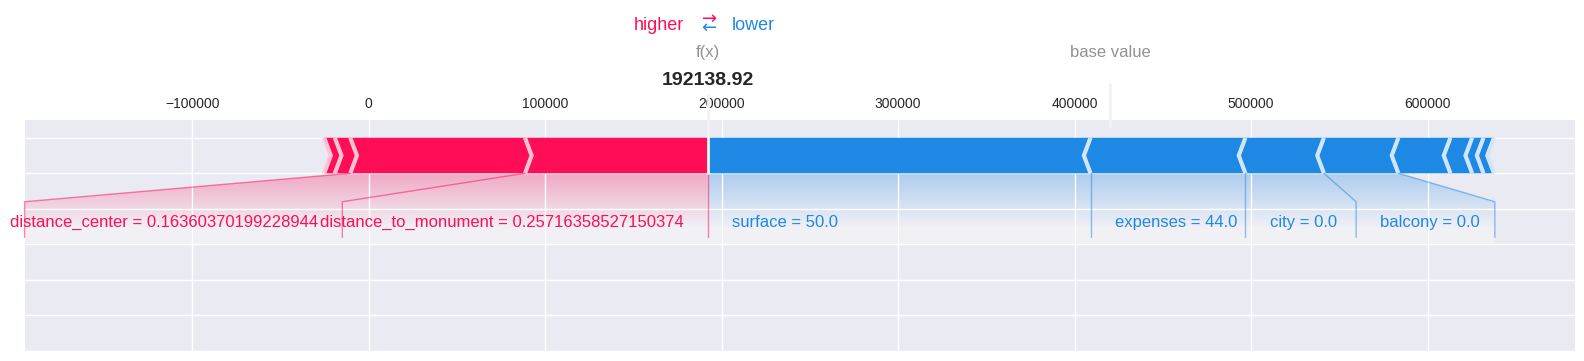

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


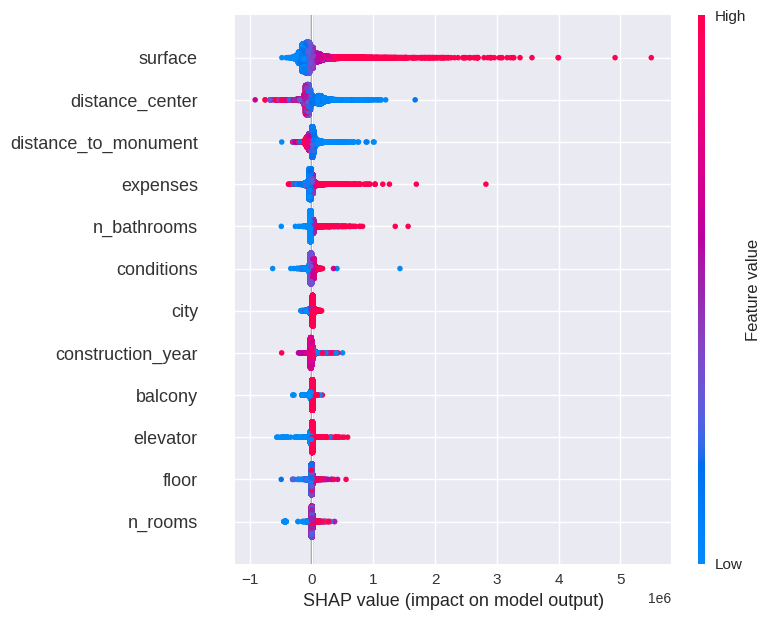

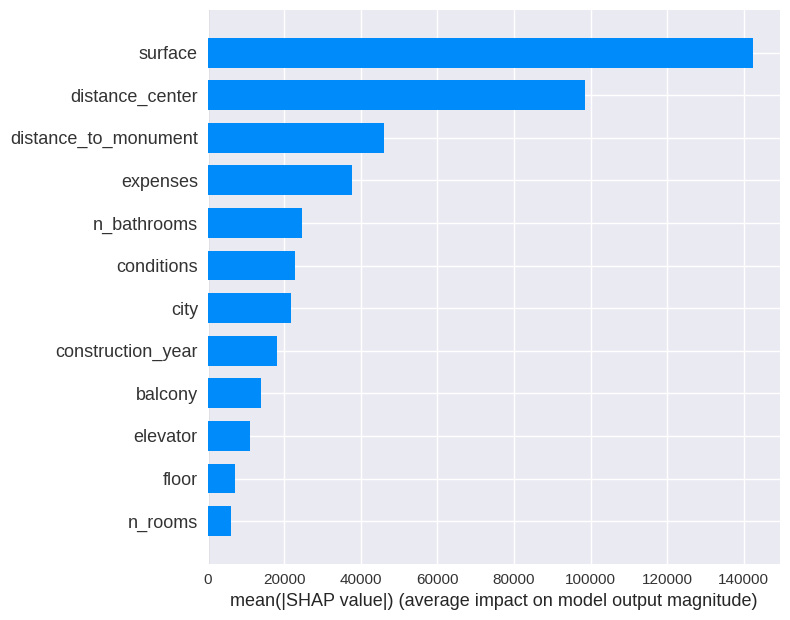

In [ ]:
# XGBOst
xgb = XGBRegressor(objective="reg:squarederror")
# Train the model
xgb.fit(X_train, y_train)
# Make predictions on the validation set
y_pred = xgb.predict(X_val)
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)
shap.initjs()


# tree = DecisionTreeRegressor()

# # Train the model
# tree.fit(X_train, y_train)

# # Make predictions on the validation set
# y_pred = tree.predict(X_val)

# # Calculate mean squared error (MSE)
# mse = mean_squared_error(y_val, y_pred)

# print("Mean Squared Error:", mse)

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)
#Force plot shows how independent variables affect the output values and the magnitude
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:], matplotlib=True)
#Summary plots give an overview of feature importance
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar')


In [ ]:
df_best

balcony  conditions  expenses  floor  n_bathrooms  elevator  n_rooms  \
0            1         1.0      30.0    2.0          1.0         0      1.0   
1            0         1.0     125.0    3.0          1.0         1      3.0   
2            0         1.0      30.0    4.0          1.0         0      1.0   
3            0         2.0      82.0    1.0          1.0         0      2.0   
4            1         1.0      97.0    3.0          2.0         1      3.0   
...        ...         ...       ...    ...          ...       ...      ...   
46306        1         1.0     580.0    2.0          2.0         1      5.0   
46307        1         1.0      35.0    3.0          1.0         0      3.0   
46308        1         0.0     170.0    6.0          2.0         1      5.0   
46310        1         1.0     150.0   -1.0          1.0         1      3.0   
46311        1         2.0     100.0    1.0          1.0         1      4.0   

       surface  construction_year  city  distance_center  \
0         35.0             1980.0     2        16.897881   
1        131.0             1809.0     2         1.334815   
2         16.0             1960.0     2         9.407839   
3        100.0             1965.0     0        12.320096   
4         90.0             1962.0     0         1.348791   
...        ...                ...   ...              ...   
46306    180.0             1950.0     1         1.137680   
46307     88.0             1929.0     2         4.763013   
46308    189.0             1920.0     2         3.771769   
46310     70.0             1965.0     1         5.626064   
46311    101.0             1970.0     2         6.105030   

       distance_to_monument    price  
0                 17.273743    60000  
1                  0.139471   900000  
2                  7.945025    33000  
3                 11.371597   166000  
4                  0.748841   410000  
...                     ...      ...  
46306              0.556221  2260000  
46307              2.453114   329999  
46308              1.616948   599000  
46310              4.488447   189000  
46311              3.366803   355000  

[40718 rows x 13 columns]

## Model 2: Random Forest

The next model I test is a random forest model. I use weights and biases to track hyperparameters as with XGBModel.

In [ ]:
train_idx = []  # the index values to be used for training
previous = 0
np.random.seed(40)

for i, quantile in enumerate(np.arange(0.001, 1.001, .001)):
    if i == 0:
        temp = df_besta[df_besta['price'] <= df_besta['price'].quantile(quantile)].copy()
        train_idx.extend(list(temp.sample(frac=0.8).index))
    else:
        temp = df_besta[(df_besta['price'] > df_besta['price'].quantile(previous)) \
                          & (df_besta['price'] <= df_besta['price'].quantile(quantile))].copy()
        train_idx.extend(list(temp.sample(frac=0.8).index))
    previous = quantile

X_train = df_besta.loc[train_idx].drop('price', axis=1)
y_train = df_besta.loc[train_idx]['price']
X_val = df_besta.loc[set(df_besta.index) - set(train_idx)].drop('price', axis=1)
y_val = df_besta.loc[set(df_besta.index) - set(train_idx)]['price']

In [ ]:
wandb.login()

In [ ]:
config = {
    "method": "random",
    "metric": {
      "name": "mse",
      "goal": "minimize"   
        },
    "parameters": { 
        "criterion": {
            "value": 'squared_error' 
            },
        "n_estimators": {
            "distribution": "q_log_uniform",
            "min": 3,
            "max": 6,
            "q": 1
            },
        "min_samples_split": {
            "distribution": 'q_uniform',
            "min": 2,
            "max": 8,
            "q": 1
            },
        "min_samples_leaf": {
            "distribution": 'q_uniform',
            "min": 1,
            "max": 8,
            "q": 1
            },
        "max_samples": {
            "distribution": 'uniform',
            "min": 0.3,
            "max": 1,
            },
        "min_impurity_decrease": {
            "distribution": 'uniform',
            "min": 0,
            "max": 10,
            },
        "max_depth": {
            "distribution": 'q_uniform',
            "min": 1,
            "max": 8,
            "q": 1
            }
          }
        }
        

Define main training loop

In [ ]:
def train_rf():
  config_defaults = {"criterion" : 'gini',
                     "n_estimators" : 100,
                     "min_samples_split" : 1,
                     "min_samples_leaf" : 1,
                     "max_samples" : 1,
                     "min_impurity_decrease" : 1,
                     "max_depth" : 1
                     }

  wandb.init(config=config_defaults, resume=False)  # defaults are over-ridden during the sweep
  config = wandb.config

  #update parameters
  params = {"criterion": config.criterion,
            "n_estimators": config.n_estimators,
            "min_samples_split": config.min_samples_split,
            "min_samples_leaf": config.min_samples_leaf,
            "max_samples": config.max_samples,
            "min_impurity_decrease": config.min_impurity_decrease,
            "max_depth": config.max_depth
        }
  
  #instantiate and fit the model
  model = RandomForestRegressor(**params)
  model.fit(X_train, y_train)

  #predict
  preds = model.predict(X_val)

  #score
  mse = mean_squared_error(y_val, preds)

  #log the score to weights and biases
  wandb.log({"mse": mse})

Initalize weights and biases agent for this model and begin training

In [ ]:
os.environ["WANDB_SILENT"] = "true" #keep training silet to prevent notebook lag
sweep_id = wandb.sweep(config, entity= "aebelge", project="ML_project_rf_model") #generate sweep id
wandb.agent(sweep_id, train_rf, entity="aebelge", project="ML_project_rf_model") #launch sweeep

#trials (dropping less relevant columns)

In [ ]:
train_idx = []  # the index values to be used for training
previous = 0
np.random.seed(40)
for i, quantile in enumerate(np.arange(0.001, 1.001, .001)):
    if i == 0:
        temp = df_best[df_best['price'] <= df_best['price'].quantile(quantile)].copy()
        train_idx.extend(list(temp.sample(frac=0.8).index))
    else:
        temp = df_best[(df_best['price'] > df_best['price'].quantile(previous)) \
                          & (df_best['price'] <= df_best['price'].quantile(quantile))].copy()
        train_idx.extend(list(temp.sample(frac=0.8).index))
    previous = quantile

X_train = df_best.loc[train_idx].drop('price', axis=1)
y_train = df_best.loc[train_idx]['price']
X_val = df_best.loc[set(df_best.index) - set(train_idx)].drop('price', axis=1)
y_val = df_best.loc[set(df_best.index) - set(train_idx)]['price']


Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


Mean Squared Error: 28505078087.657555


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


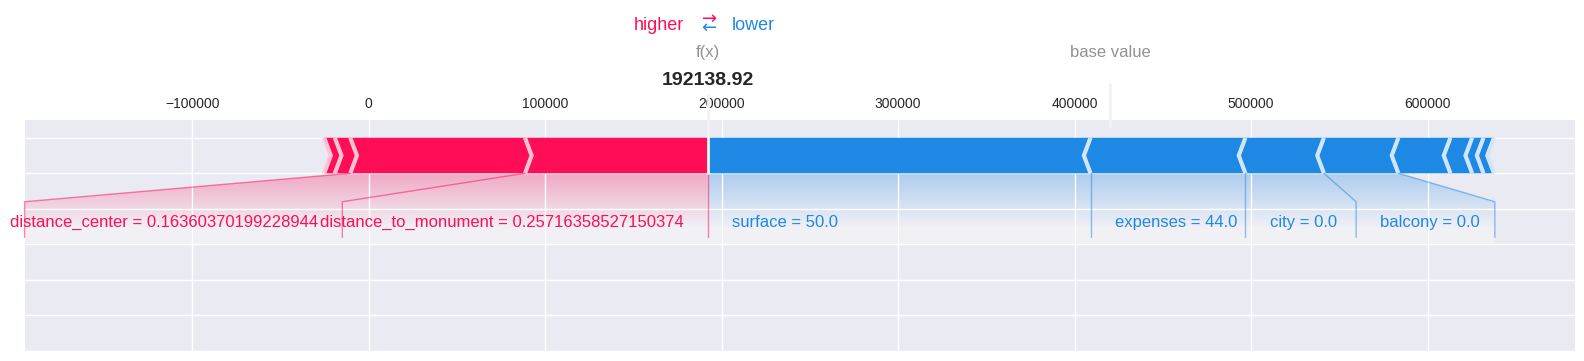

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


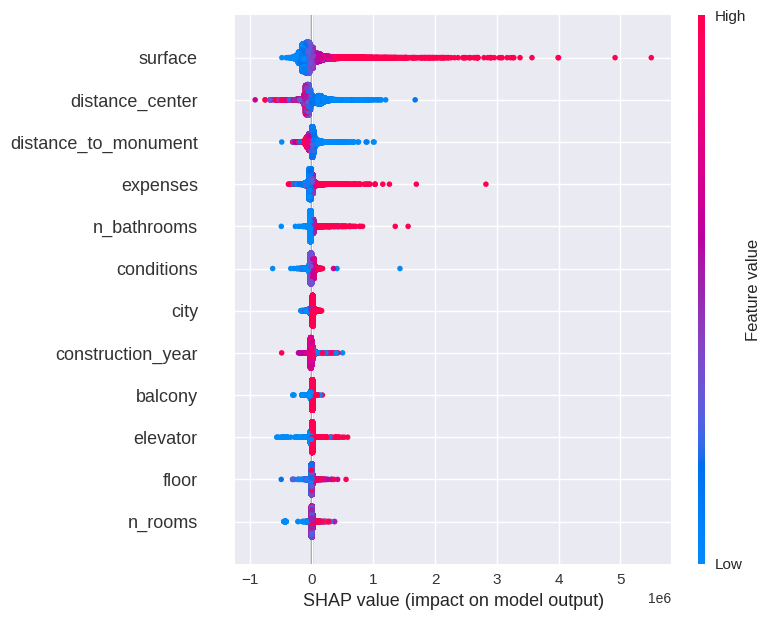

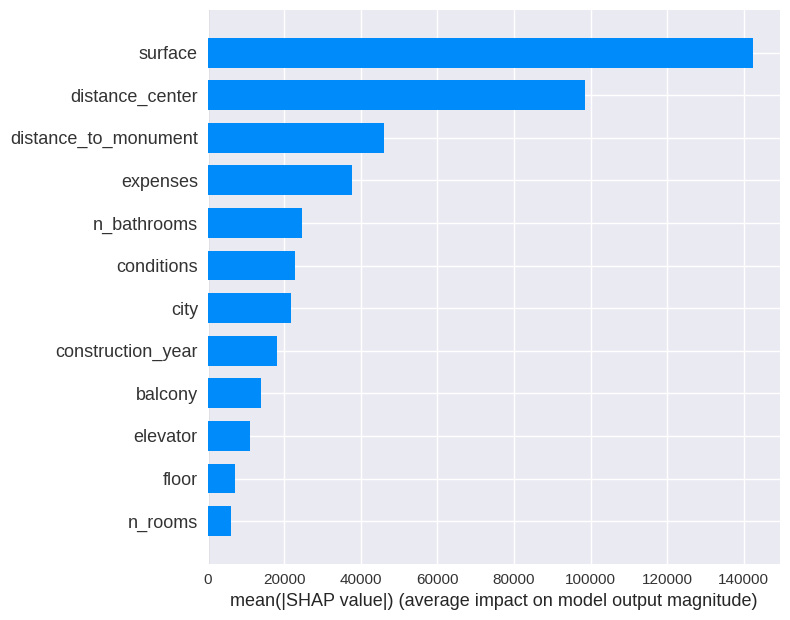

In [ ]:
# XGBOst
xgb = XGBRegressor(objective="reg:squarederror")
# Train the model
xgb.fit(X_train, y_train)
# Make predictions on the validation set
y_pred = xgb.predict(X_val)
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)
shap.initjs()


# tree = DecisionTreeRegressor()

# # Train the model
# tree.fit(X_train, y_train)

# # Make predictions on the validation set
# y_pred = tree.predict(X_val)

# # Calculate mean squared error (MSE)
# mse = mean_squared_error(y_val, y_pred)

# print("Mean Squared Error:", mse)

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)
#Force plot shows how independent variables affect the output values and the magnitude
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:], matplotlib=True)
#Summary plots give an overview of feature importance
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar')


In [ ]:
df_best1 = df_best.drop(["floor","n_rooms","elevator", "construction_year", "balcony"], axis = 1)

In [ ]:
train_idx = []  # the index values to be used for training
previous = 0
np.random.seed(40)
for i, quantile in enumerate(np.arange(0.001, 1.001, .001)):
    if i == 0:
        temp = df_best1[df_best1['price'] <= df_best1['price'].quantile(quantile)].copy()
        train_idx.extend(list(temp.sample(frac=0.8).index))
    else:
        temp = df_best1[(df_best1['price'] > df_best1['price'].quantile(previous)) \
                          & (df_best1['price'] <= df_best1['price'].quantile(quantile))].copy()
        train_idx.extend(list(temp.sample(frac=0.8).index))
    previous = quantile

X_train = df_best1.loc[train_idx].drop('price', axis=1)
y_train = df_best1.loc[train_idx]['price']
X_val = df_best1.loc[set(df_best1.index) - set(train_idx)].drop('price', axis=1)
y_val = df_best1.loc[set(df_best1.index) - set(train_idx)]['price']


Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


Mean Squared Error: 30425097279.618332


ntree_limit is deprecated, use `iteration_range` or model slicing instead.


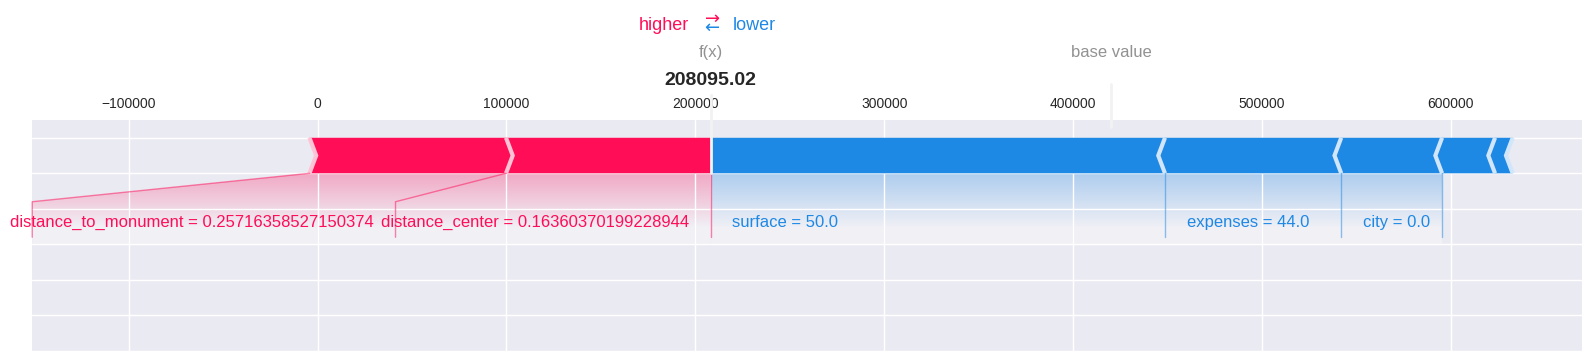

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


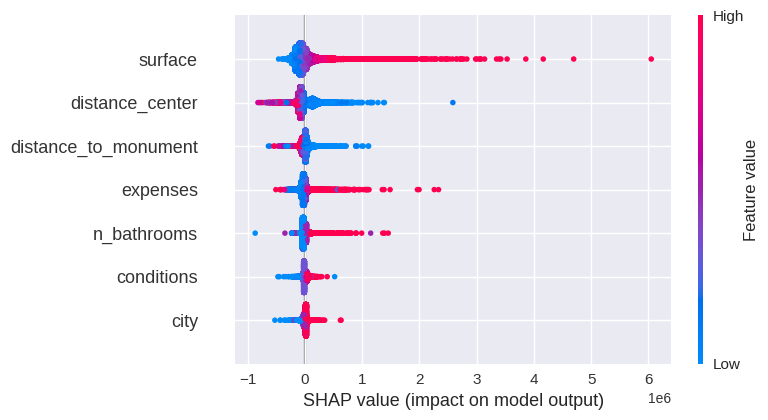

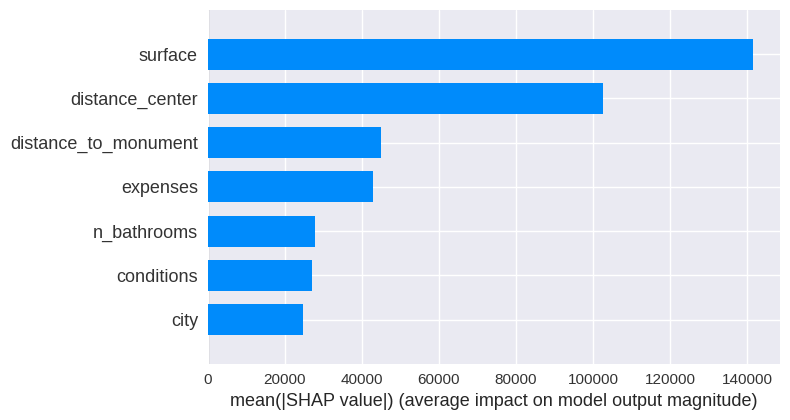

In [ ]:
# XGBOst
xgb = XGBRegressor(objective="reg:squarederror")
# Train the model
xgb.fit(X_train, y_train)
# Make predictions on the validation set
y_pred = xgb.predict(X_val)
# Calculate mean squared error (MSE)
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)
shap.initjs()


# tree = DecisionTreeRegressor()

# # Train the model
# tree.fit(X_train, y_train)

# # Make predictions on the validation set
# y_pred = tree.predict(X_val)

# # Calculate mean squared error (MSE)
# mse = mean_squared_error(y_val, y_pred)

# print("Mean Squared Error:", mse)

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)
#Force plot shows how independent variables affect the output values and the magnitude
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:], matplotlib=True)
#Summary plots give an overview of feature importance
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns)
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar')


#Final Predictions

In [ ]:
df_besta = df_best.drop(["floor","n_rooms","elevator", "balcony"], axis = 1)

In [ ]:
train_idx = []  # the index values to be used for training
previous = 0
np.random.seed(40)
for i, quantile in enumerate(np.arange(0.001, 1.001, .001)):
    if i == 0:
        temp = df_besta[df_besta['price'] <= df_besta['price'].quantile(quantile)].copy()
        train_idx.extend(list(temp.sample(frac=0.8).index))
    else:
        temp = df_besta[(df_besta['price'] > df_besta['price'].quantile(previous)) \
                          & (df_besta['price'] <= df_besta['price'].quantile(quantile))].copy()
        train_idx.extend(list(temp.sample(frac=0.8).index))
    previous = quantile

X_train = df_besta.loc[train_idx].drop('price', axis=1)
y_train = df_besta.loc[train_idx]['price']
X_val = df_besta.loc[set(df_besta.index) - set(train_idx)].drop('price', axis=1)
y_val = df_besta.loc[set(df_besta.index) - set(train_idx)]['price']


Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.


In [ ]:
params = {'colsample_bytree': 0.546794135358533,
          'learning_rate': 0.15097359269008223,
          'max_depth': 4,
          'min_child_weight': 1.2420881070597578,
          'min_split_gain': 2.265829960450767,
          'n_estimators': 35,
          'objective': "reg:squarederror",
          'reg_lambda': 3.9116380671720297,
          'subsample': 0.6832110296582569}


In [ ]:
xgb = XGBModel(**params
)

# Train the model
xgb.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = xgb.predict(X_val)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_val, y_pred)

print("Mean Squared Error:", mse)

[23:36:40] WARNING: ../src/learner.cc:767: 
Parameters: { "min_split_gain" } are not used.

Mean Squared Error: 34116413666.358685


In [ ]:
test_imput

id  balcony  conditions  floor  n_bathrooms  elevator  n_rooms  \
0      18825        1         3.0    3.0     1.000000         1      2.0   
1      30956        0         1.0    0.0     1.000000         0      2.0   
2      47193        0         1.0   -1.0     3.000000         0      3.0   
3      27799        1         1.0    6.0     0.808731         0      3.0   
4      22259        1         1.0    4.0     2.000000         1      3.0   
...      ...      ...         ...    ...          ...       ...      ...   
19783  22961        1         1.0    3.0     2.000000         1      4.0   
19784   4606        0         1.0    2.0     1.000000         0      2.0   
19785   6106        0         1.0    0.0     2.000000         0      3.0   
19786  35370        1         2.0    1.0     1.000000         1      3.0   
19787  24890        1         1.0    0.0     1.000000         0      3.0   

       surface  city  distance_center  distance_to_monument    expenses  \
0         72.0     2        13.295491             13.861668   76.705070   
1         60.0     0         1.593403              0.968298   85.698197   
2        140.0     1         1.680479              0.820334  236.595159   
3         98.0     0         8.294190              7.411320  119.457996   
4         83.0     2        13.541895             13.906552   65.000000   
...        ...   ...              ...                   ...         ...   
19783    135.0     2         4.801269              3.527471   50.000000   
19784    120.0     0         1.038532              0.290391  105.278016   
19785    112.0     2        12.470369              6.851345   93.691878   
19786     50.0     2         7.263984              7.207918   50.000000   
19787     50.0     2        21.888030             14.660636   77.616169   

       construction_year  
0            2010.000000  
1            1900.000000  
2            1904.272797  
3            1962.000000  
4            2006.000000  
...                  ...  
19783        1980.000000  
19784        1741.197138  
19785        1984.575687  
19786        1970.000000  
19787        2013.000000  

[19788 rows x 13 columns]

In [ ]:
test_topred = test_imput.drop(["id","n_rooms","elevator","balcony","floor","construction_year"], axis = 1)

In [ ]:
test_topred[test_topred["expenses"]<10]

In [ ]:
df_besta

conditions  expenses  n_bathrooms  surface  city  distance_center  \
0             1.0      30.0          1.0     35.0     2        16.897881   
1             1.0     125.0          1.0    131.0     2         1.334815   
2             1.0      30.0          1.0     16.0     2         9.407839   
3             2.0      82.0          1.0    100.0     0        12.320096   
4             1.0      97.0          2.0     90.0     0         1.348791   
...           ...       ...          ...      ...   ...              ...   
46306         1.0     580.0          2.0    180.0     1         1.137680   
46307         1.0      35.0          1.0     88.0     2         4.763013   
46308         0.0     170.0          2.0    189.0     2         3.771769   
46310         1.0     150.0          1.0     70.0     1         5.626064   
46311         2.0     100.0          1.0    101.0     2         6.105030   

       distance_to_monument    price  
0                 17.273743    60000  
1                  0.139471   900000  
2                  7.945025    33000  
3                 11.371597   166000  
4                  0.748841   410000  
...                     ...      ...  
46306              0.556221  2260000  
46307              2.453114   329999  
46308              1.616948   599000  
46310              4.488447   189000  
46311              3.366803   355000  

[40718 rows x 8 columns]

In [ ]:
column_order = ['conditions', 'expenses', 'n_bathrooms',
                 'surface', 'city', 'distance_center',
                'distance_to_monument']

# Reorder the columns using double brackets
test_topred = test_topred[column_order]

In [ ]:
final = xgb.predict(test_topred)

In [ ]:
df_final = pd.DataFrame(final, columns = ["price"])

In [ ]:
df_final["id"] = test_imput["id"]

In [ ]:
df_final = df_final[['id', 'price']]


In [ ]:
df_final.describe()

In [ ]:
df_final.to_csv("/content/hadiya.csv", index = False)